In [1]:
## importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## filtering warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
## importing the dataset
heart = pd.read_csv('heart_v2.csv')

### checking out the dataset

In [4]:
## head
heart.head()

age  sex   BP  cholestrol  heart disease
0   70    1  130         322              1
1   67    0  115         564              0
2   57    1  124         261              1
3   64    1  128         263              0
4   74    0  120         269              0

In [5]:
## shape
heart.shape

(270, 5)

In [6]:
## null and dytpes
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


- Data set looks clean and in order!
- No need for any fixing 
- We can directly jump to data preperation.

## Data Preperation
- Just splitting is required.
- No need for scaling or normalisation as we are building decision tree

### Splitting into X and y labels

In [7]:
## Creating y
y = heart.pop('heart disease')
y.head()

0    1
1    0
2    1
3    0
4    0
Name: heart disease, dtype: int64

In [8]:
## Creating X
X = heart
X.head()

age  sex   BP  cholestrol
0   70    1  130         322
1   67    0  115         564
2   57    1  124         261
3   64    1  128         263
4   74    0  120         269

### Train-Test-Split

In [9]:
## importing libararies
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [11]:
## checking resultant dataframes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(189, 4)
(81, 4)
(189,)
(81,)


- The data is ready to be fed into the model

### Making the decision tree model
- Fitting the decision tree with default hyperparameters, apart from max_depth which is 3 so that we can plot and read the tree.

In [12]:
## importing libraries
from sklearn.tree import DecisionTreeClassifier

In [13]:
## instantiating the object
dt = DecisionTreeClassifier(max_depth=3)

In [14]:
## fitting into the model
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

### Visualising the decision tree

In [15]:
!pip install six

In [16]:
!pip install ipython

In [17]:
!pip install pydotplus

In [18]:
!pip install graphviz

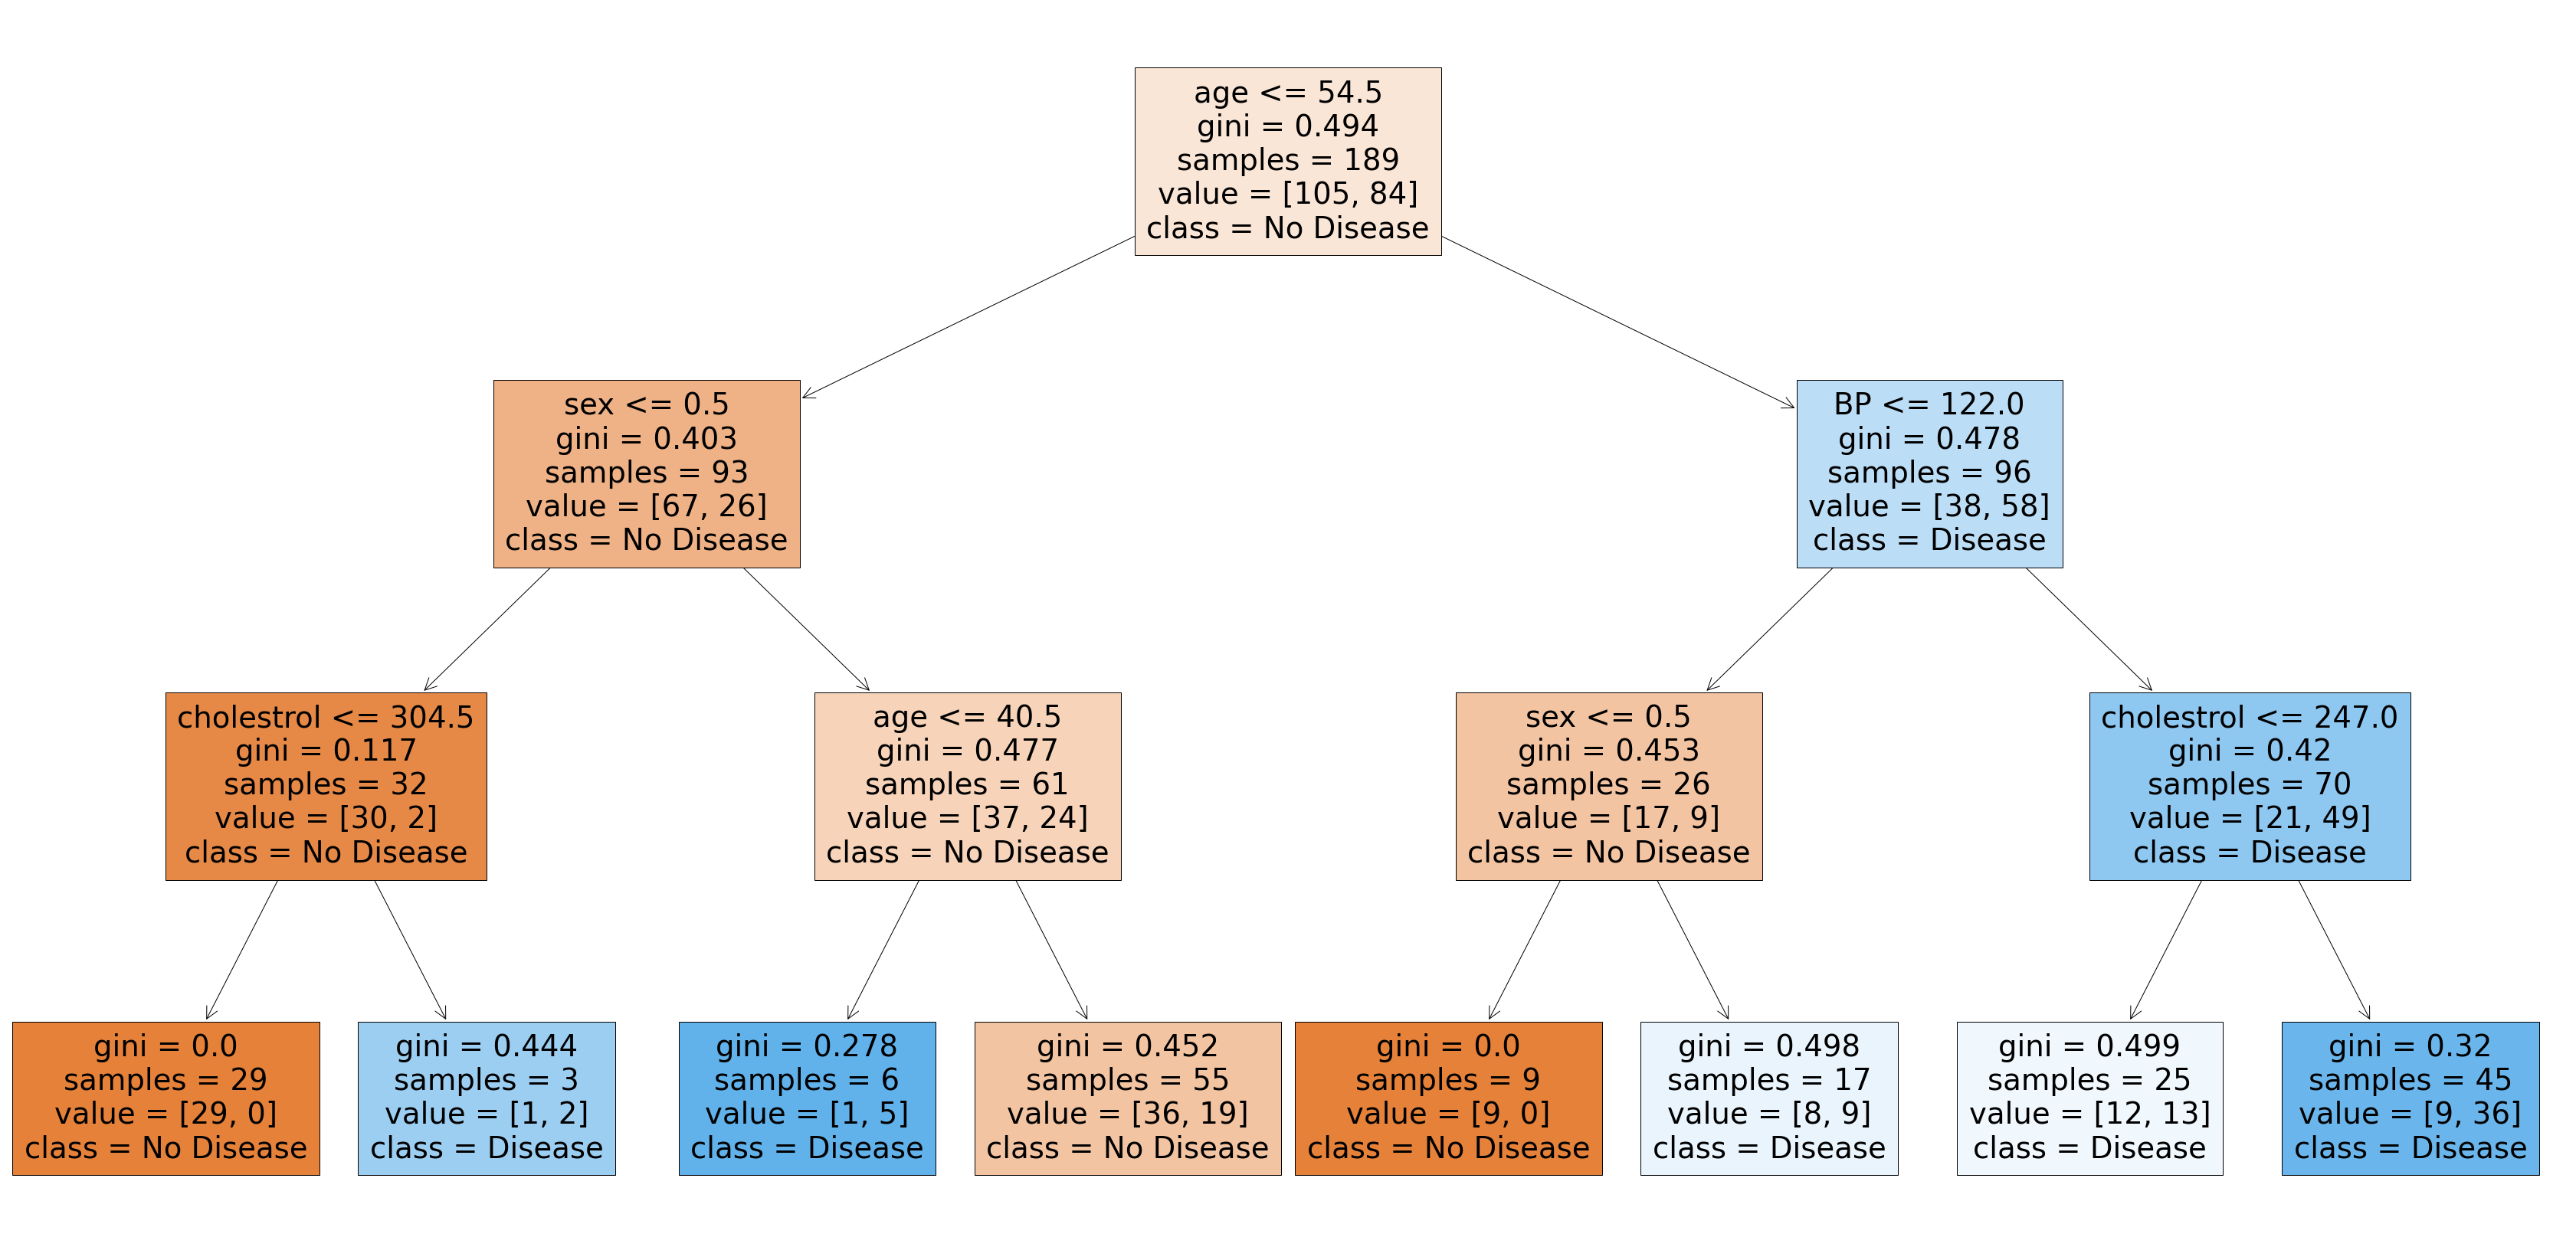

In [19]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = X.columns,class_names=['No Disease', "Disease"],filled=True)
plt.show()

### Evaluating model performance

In [20]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [22]:
print('Accuracy Score for train set:',accuracy_score(y_train,y_train_pred))
print('Confusion Matrix for train set:',confusion_matrix(y_train,y_train_pred))

Accuracy Score for train set: 0.7354497354497355
Confusion Matrix for train set: [[74 31]
 [19 65]]


In [23]:
print('Accuracy Score for test set:',accuracy_score(y_test,y_test_pred))
print('Confusion Matrix for test set:',confusion_matrix(y_test,y_test_pred))

Accuracy Score for test set: 0.5432098765432098
Confusion Matrix for test set: [[22 23]
 [14 22]]


# Let's try to fiddle with the tree with some hyperparameter tuning.

- We will create two helper fucntions to be used as templates in future projects as well:
   - 1. Function for plotting tree
   - 2. Function for metrics

### Creating helper functions to evaluate model performance and help plot the decision tree

In [24]:
## importing libraries
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [25]:
## function for plotting tree
def get_dt_graph(dt_classifier):
    plt.figure(figsize=(60,30))
    plot_tree(dt_classifier, feature_names = X.columns,class_names=['No Disease', "Disease"],filled=True)
    plt.show()

In [26]:
## function for metrics
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

### Tinkering with the model

### First let's create tree with default settings

In [27]:
## Creating tree with default settings
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

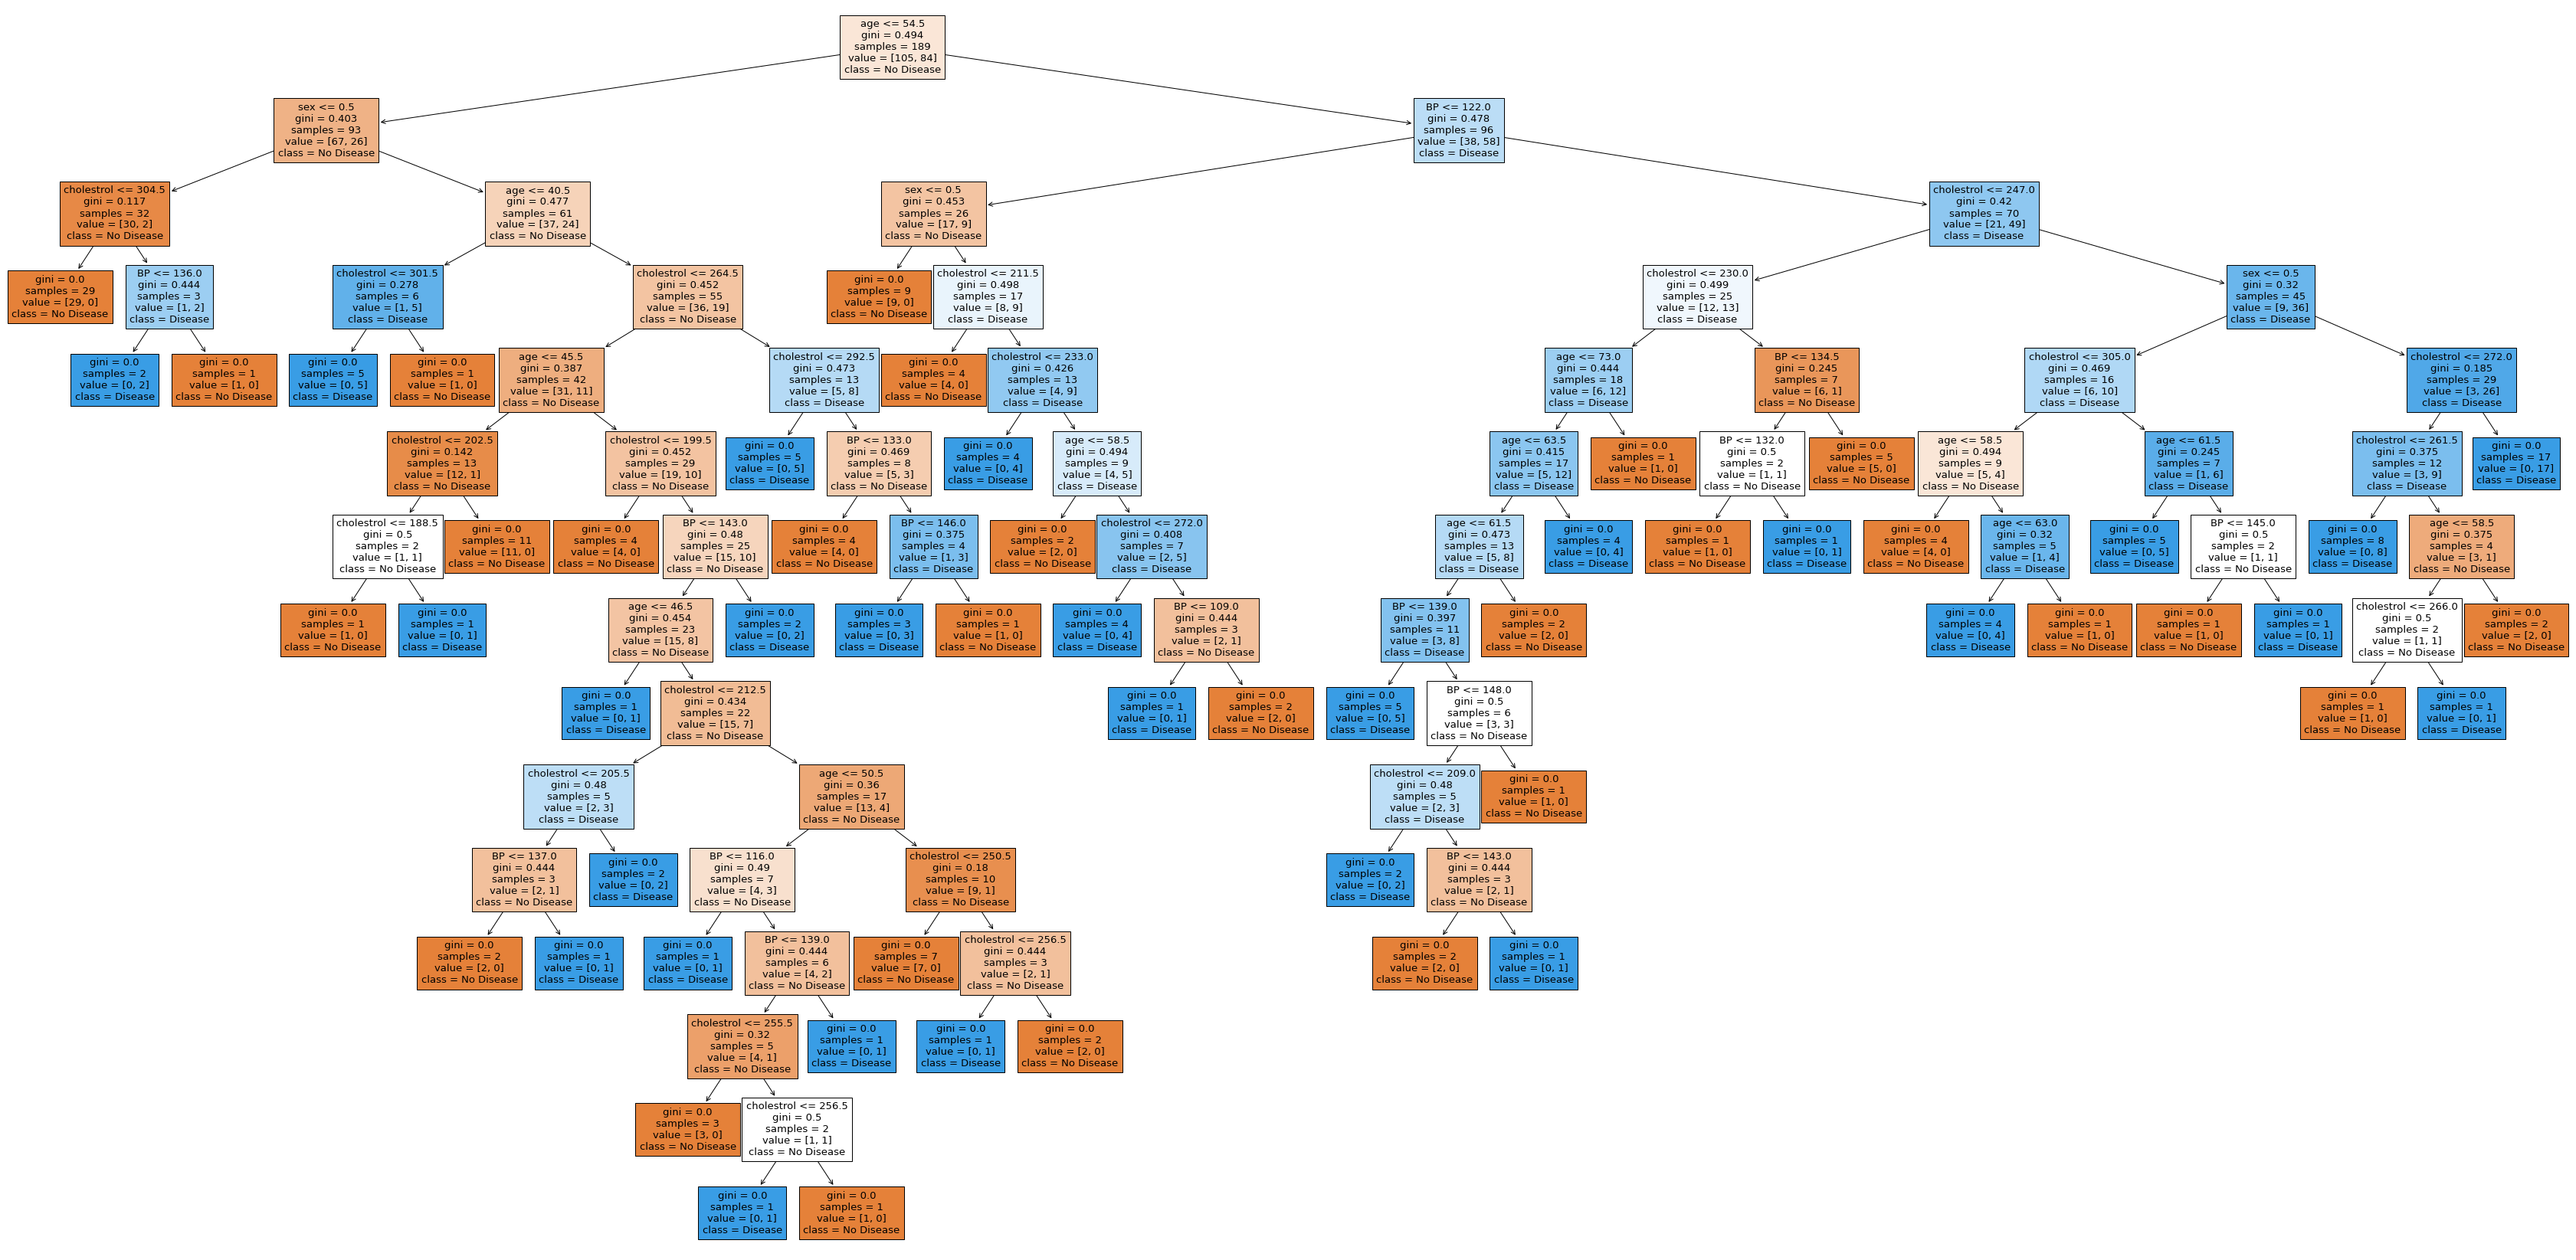

In [28]:
## plotting graph
get_dt_graph(dt_default)

In [29]:
evaluate_model(dt_default)

Train Accuracy : 1.0
Train Confusion Matrix:
[[105   0]
 [  0  84]]
--------------------------------------------------
Test Accuracy : 0.6049382716049383
Test Confusion Matrix:
[[30 15]
 [17 19]]


- Clearly the case of overfitting!!

### Changing Depth of the Tree 

In [30]:
?DecisionTreeClassifier

In [31]:
dt_depth = DecisionTreeClassifier(max_depth=3)
dt_depth.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

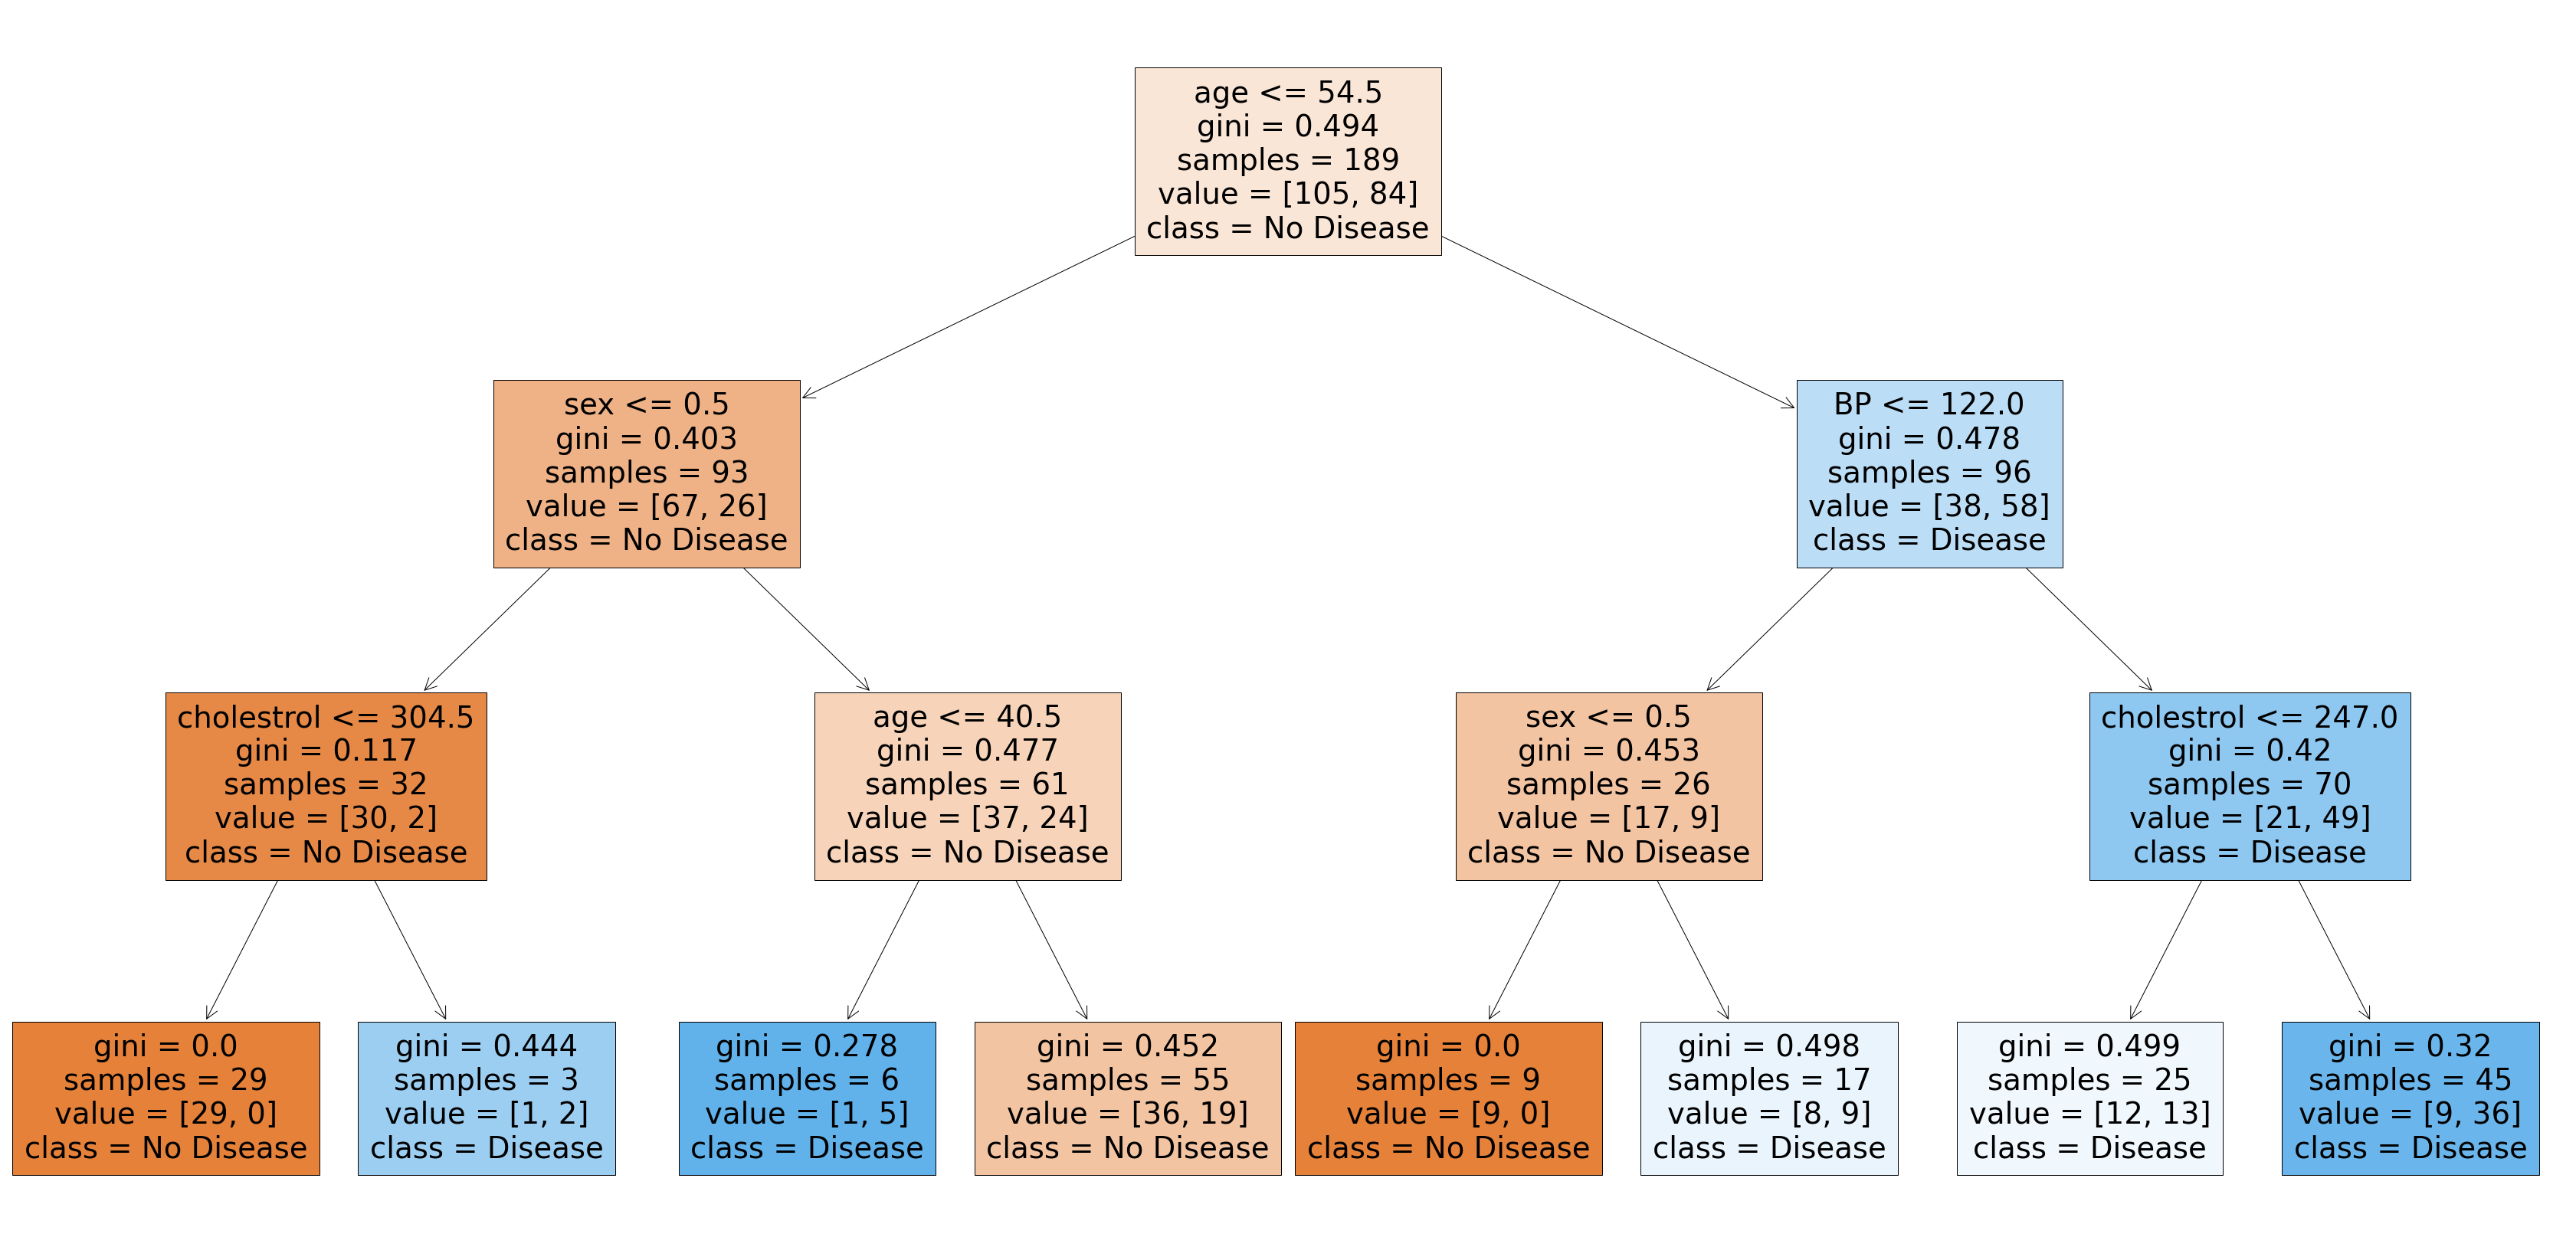

In [32]:
get_dt_graph(dt_depth)

In [33]:
evaluate_model(dt_depth)

Train Accuracy : 0.7354497354497355
Train Confusion Matrix:
[[74 31]
 [19 65]]
--------------------------------------------------
Test Accuracy : 0.5432098765432098
Test Confusion Matrix:
[[22 23]
 [14 22]]


### Specifying minimum samples before split

In [34]:
dt_min_split  = DecisionTreeClassifier(min_samples_split=20)
dt_min_split.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=20)

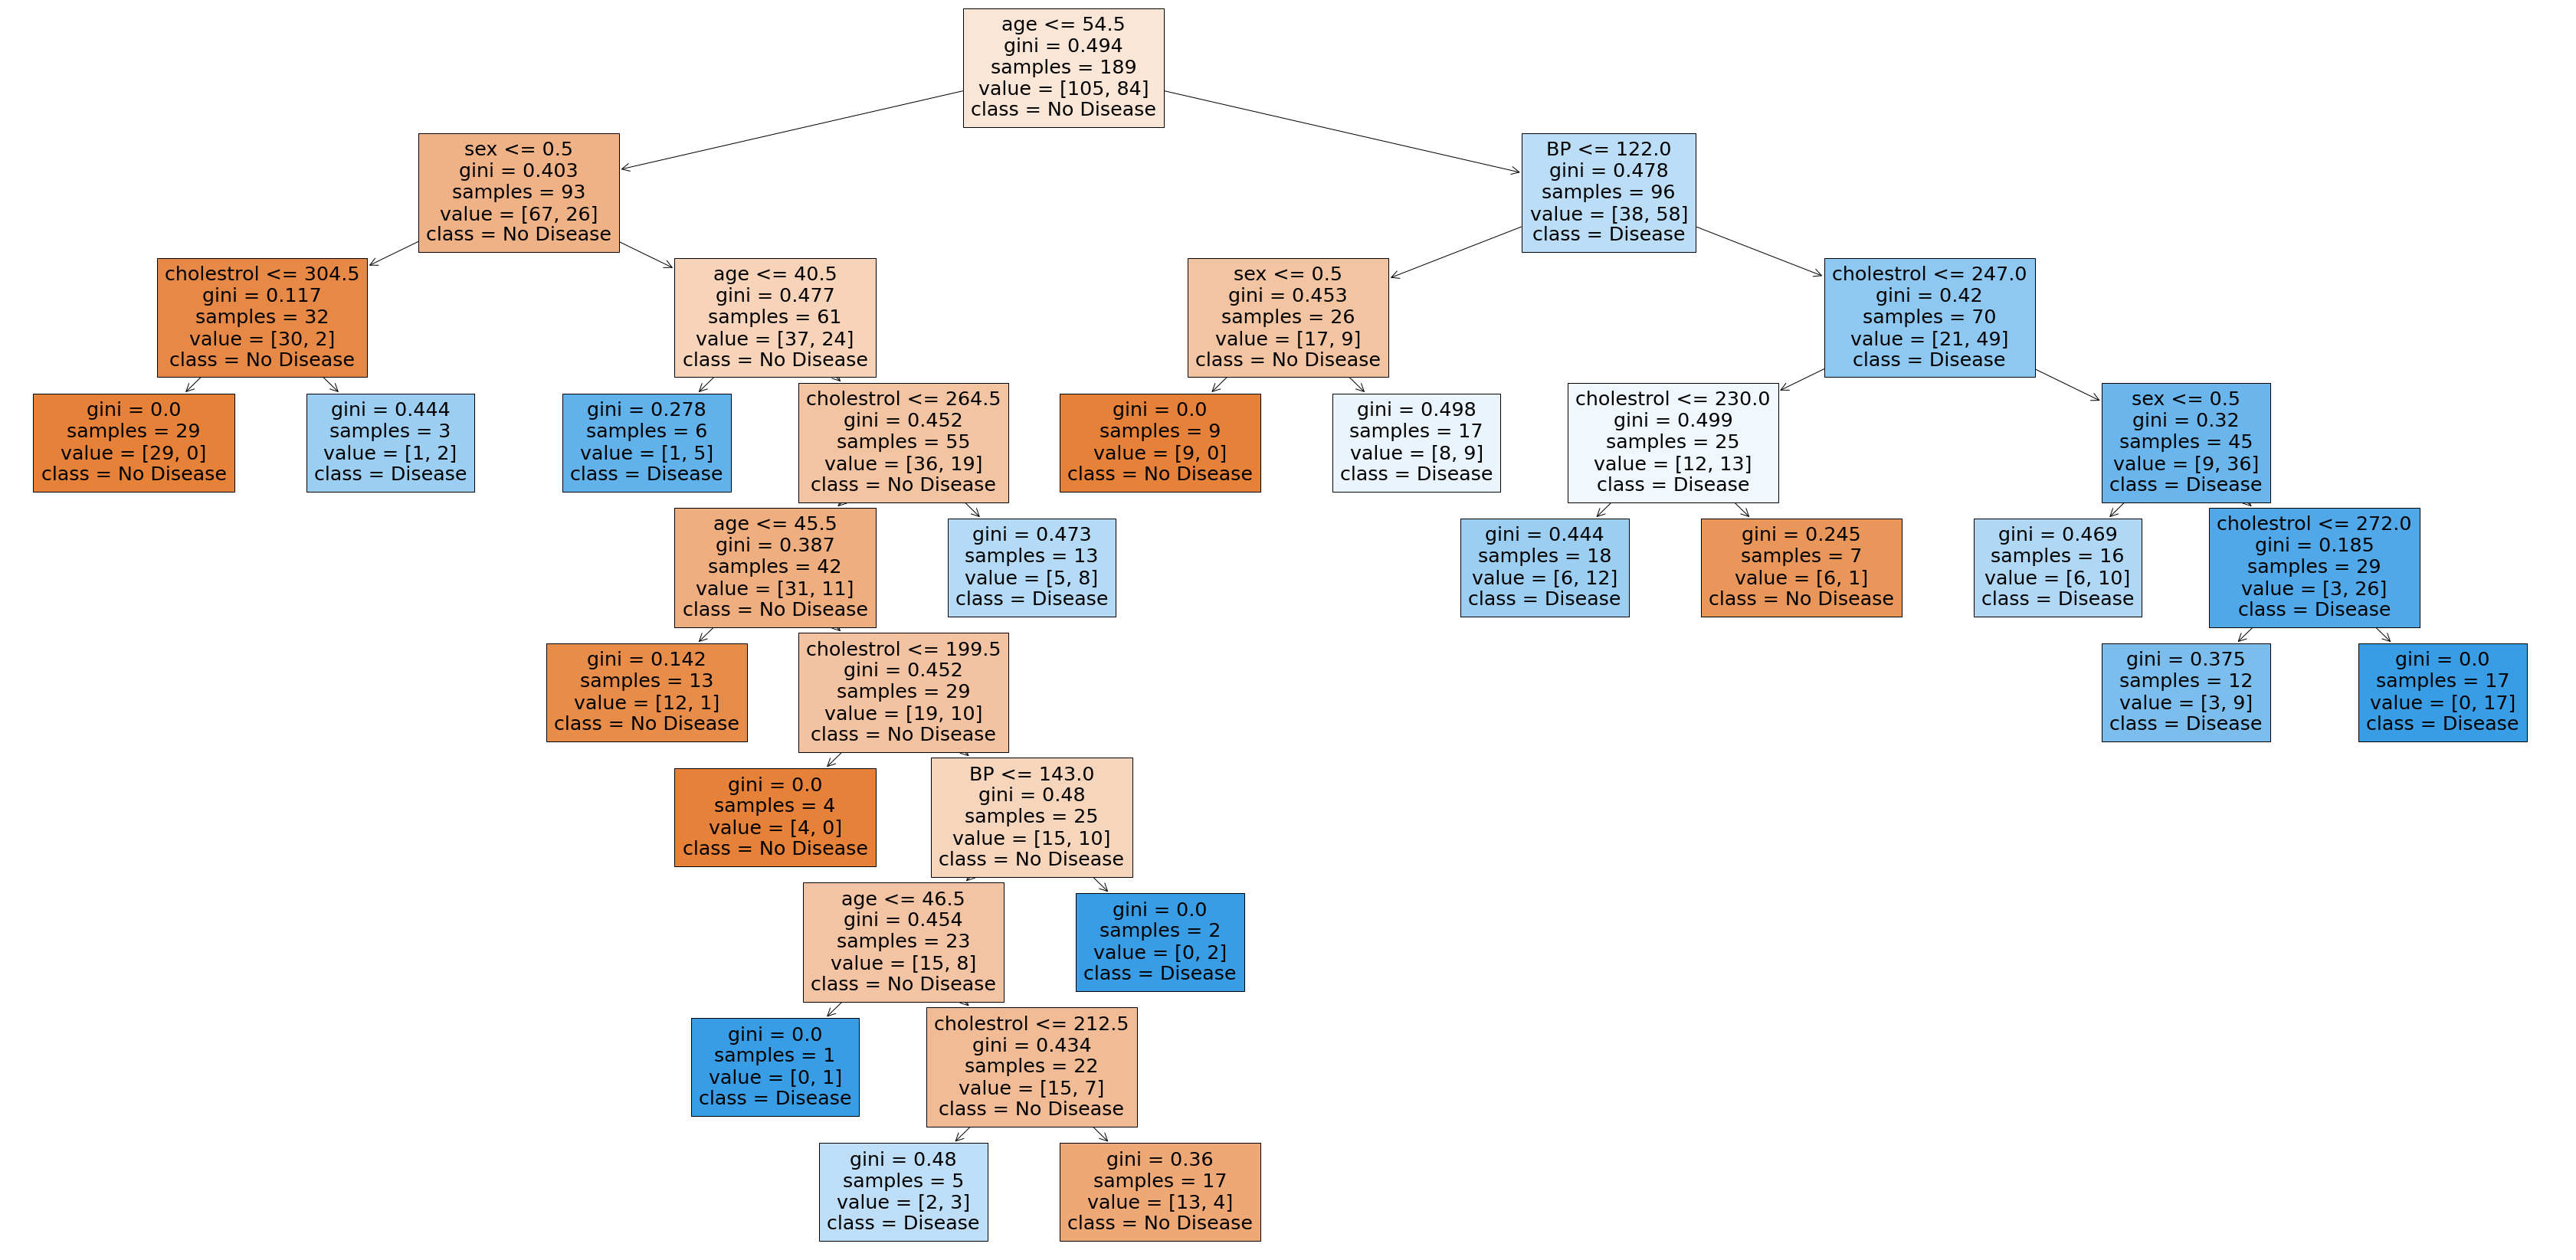

In [35]:
get_dt_graph(dt_min_split)

In [36]:
evaluate_model(dt_min_split)

Train Accuracy : 0.798941798941799
Train Confusion Matrix:
[[73 32]
 [ 6 78]]
--------------------------------------------------
Test Accuracy : 0.5308641975308642
Test Confusion Matrix:
[[18 27]
 [11 25]]


### Specifying minimum samples in leaf node

In [37]:
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20,random_state=42)
dt_min_leaf.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

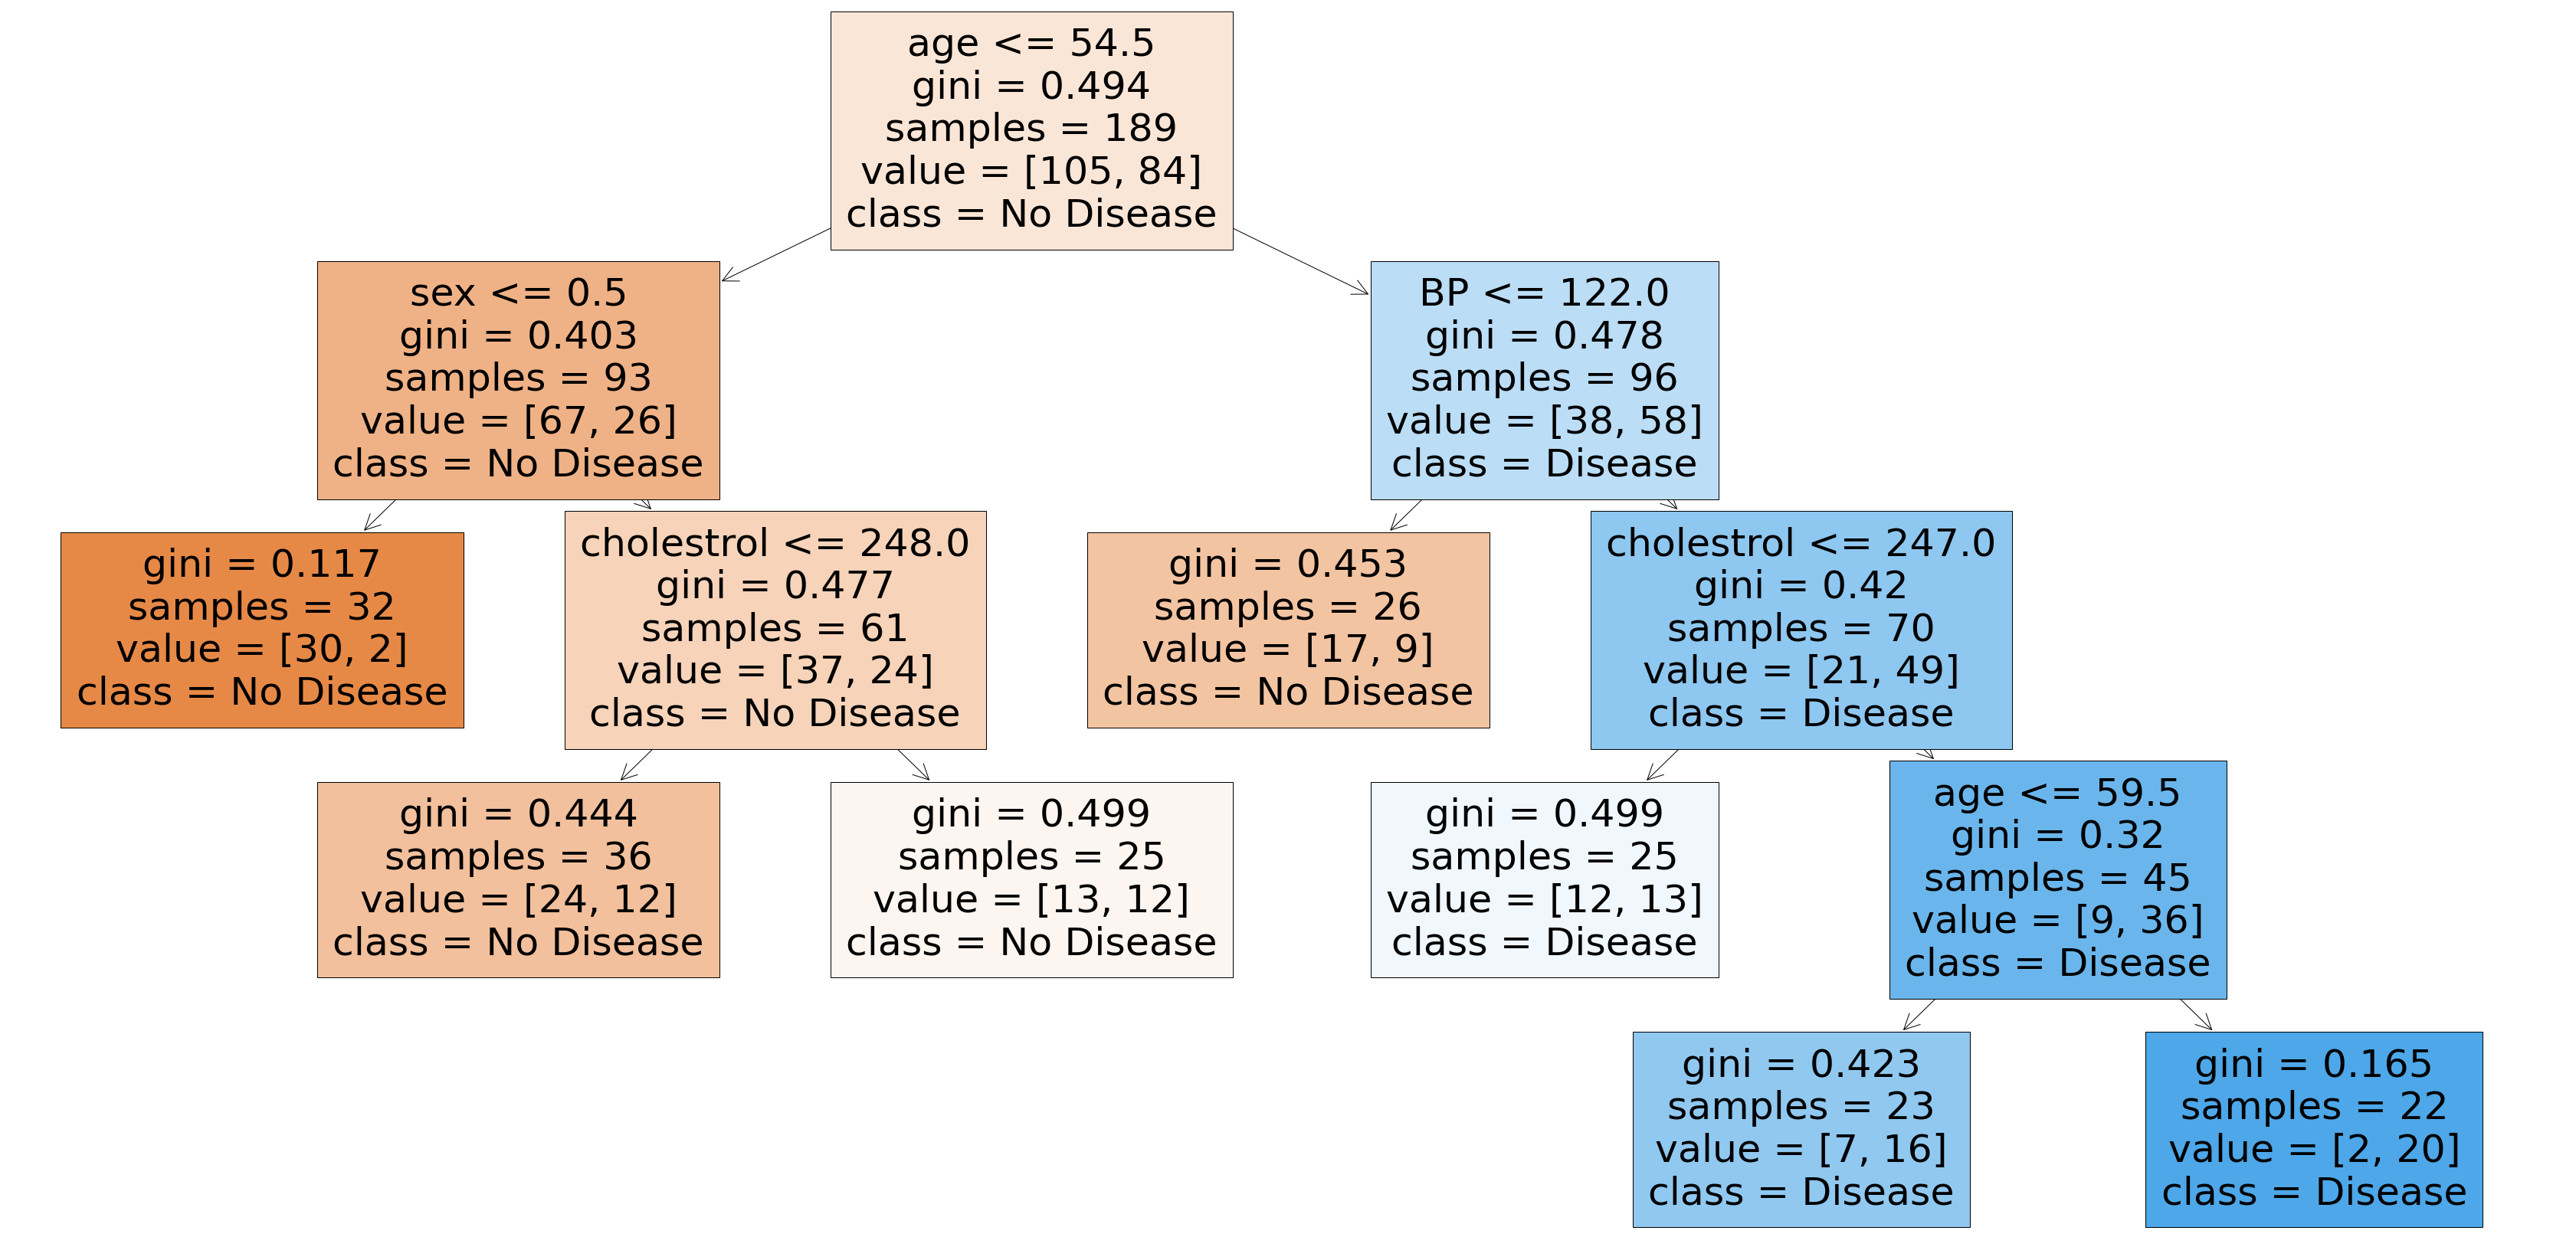

In [38]:
get_dt_graph(dt_min_leaf)

In [39]:
evaluate_model(dt_min_leaf)

Train Accuracy : 0.7037037037037037
Train Confusion Matrix:
[[84 21]
 [35 49]]
--------------------------------------------------
Test Accuracy : 0.5308641975308642
Test Confusion Matrix:
[[27 18]
 [20 16]]


### Using Entropy instead of Gini

In [40]:
dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=20,random_state=42,criterion='entropy')
dt_min_leaf_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=42)

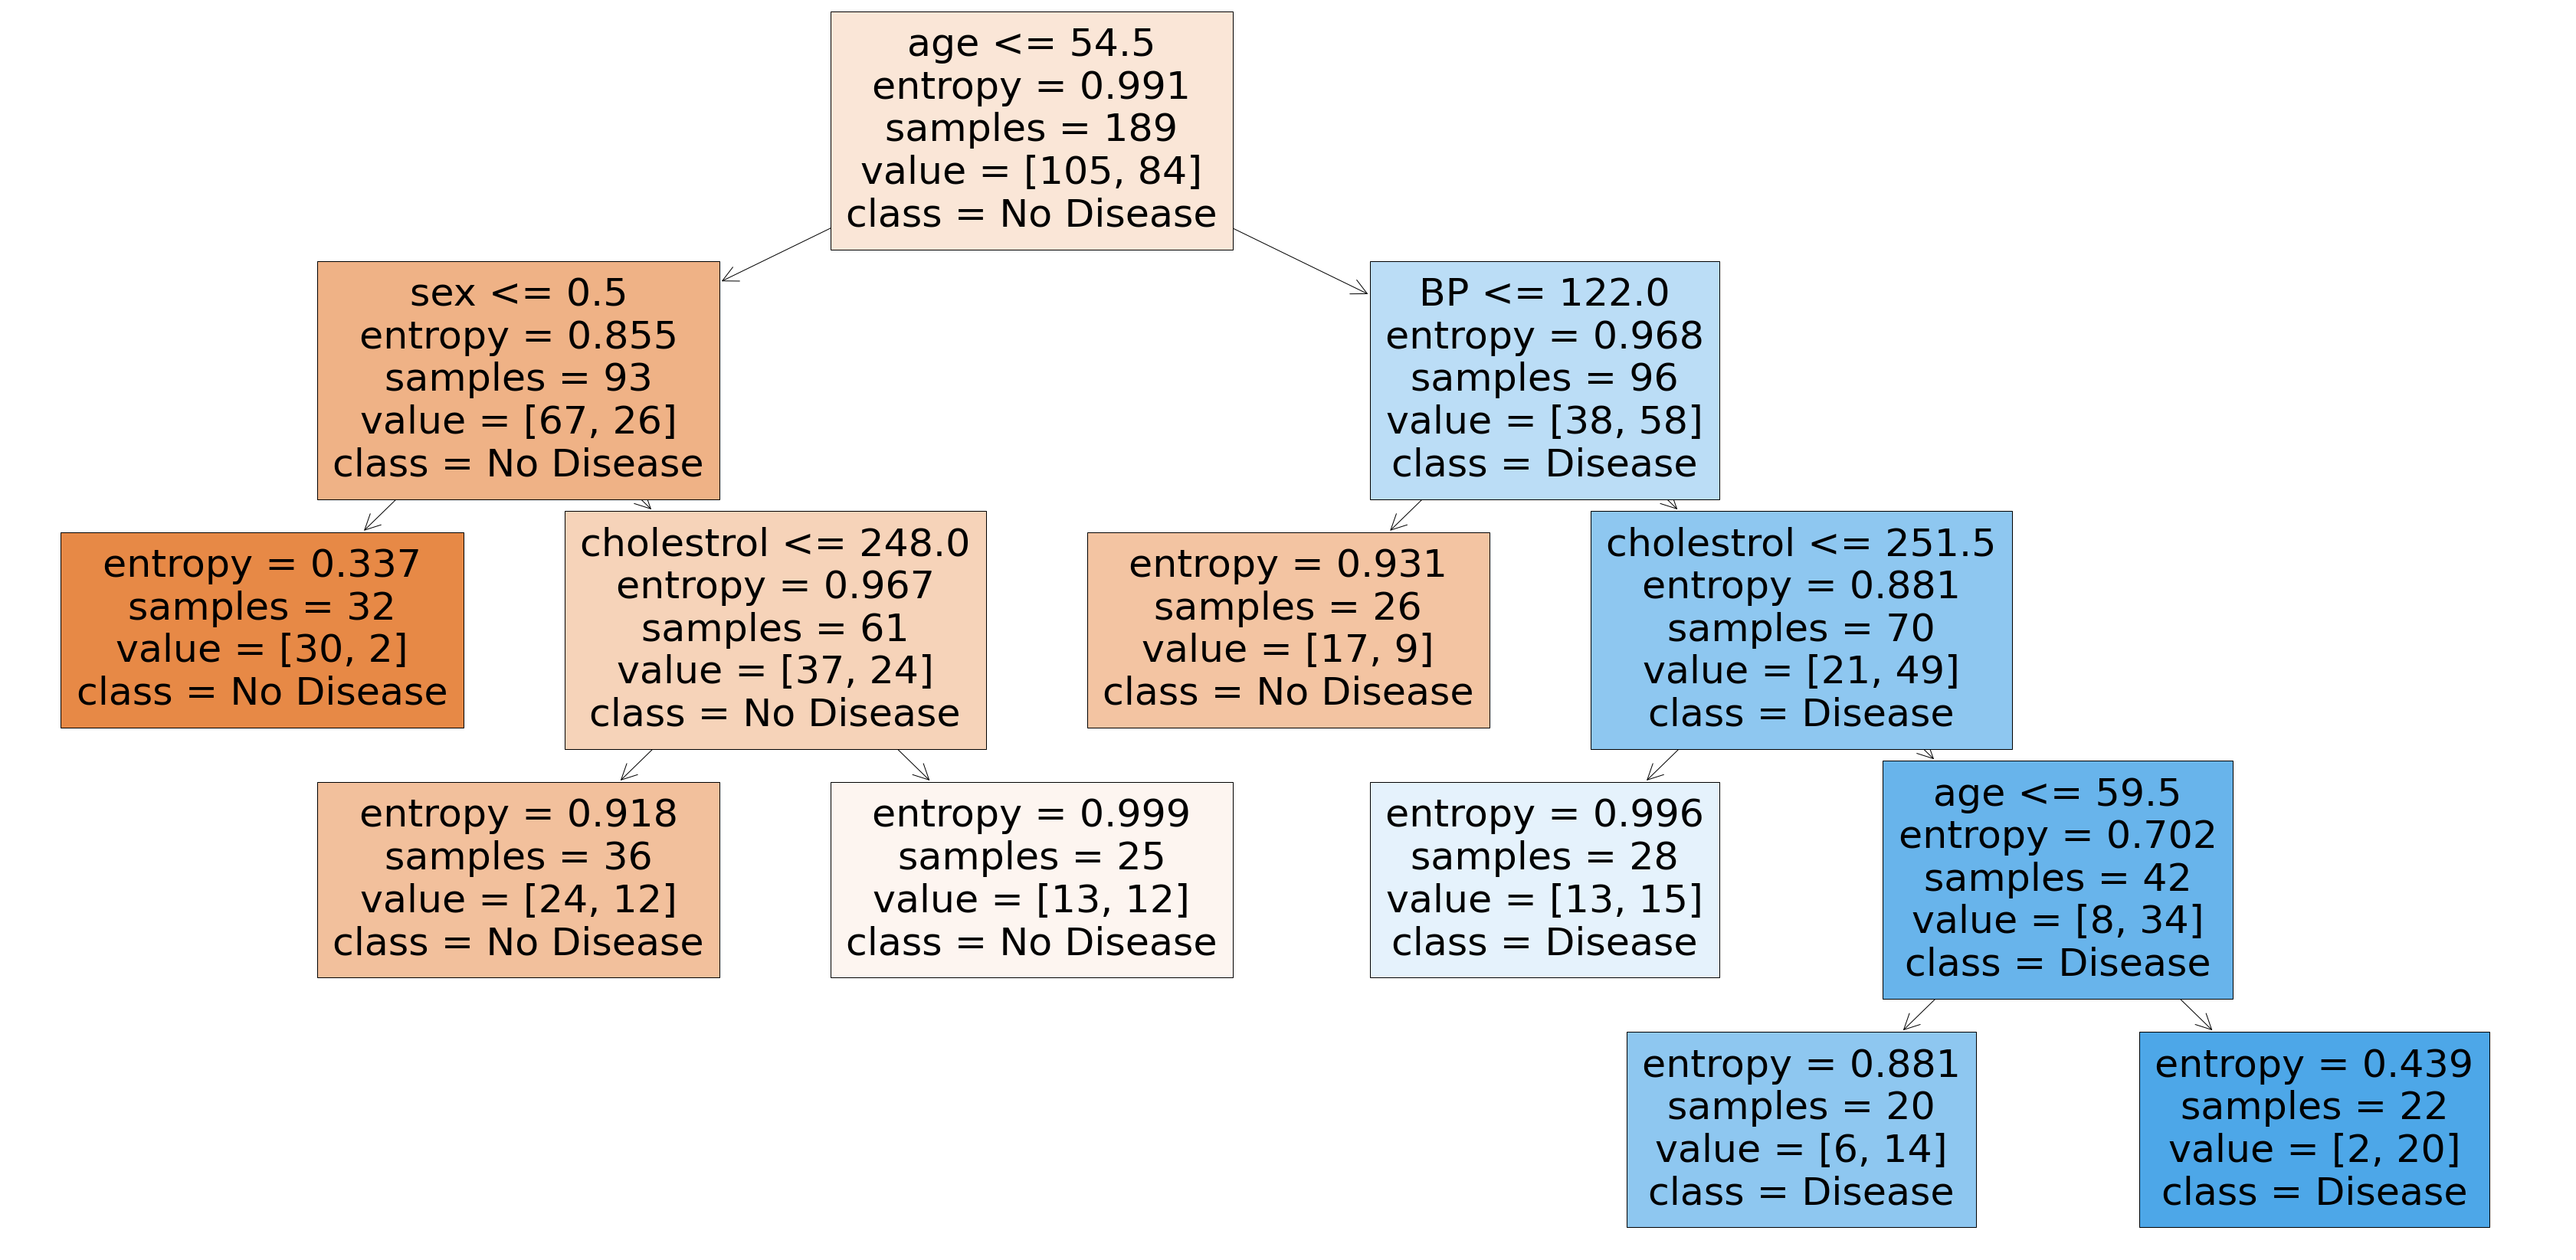

In [41]:
get_dt_graph(dt_min_leaf_entropy)

In [42]:
evaluate_model(dt_min_leaf_entropy)

Train Accuracy : 0.7037037037037037
Train Confusion Matrix:
[[84 21]
 [35 49]]
--------------------------------------------------
Test Accuracy : 0.5308641975308642
Test Confusion Matrix:
[[27 18]
 [20 16]]


### Till now we did manual Hyperparameter Tuning , now let's use GridSearchCV to go for automated Hyperparameter Tuning

In [43]:
## Intsantiating tree object with default settings
dt_hyp = DecisionTreeClassifier(random_state=42)

In [44]:
## importing GridSearchCV 
from sklearn.model_selection import GridSearchCV 

In [45]:
## creating the dictionary of the parameters
params = {
    'max_depth':[2,3,5,10,20],
    'min_samples_leaf':[5,10,20,50,100],
    'criterion':['gini','entropy']
}

In [46]:
## making GridSeachCV
grid_search = GridSearchCV(estimator=dt_hyp ,param_grid=params,
                          cv=4,scoring='accuracy',n_jobs=-1,verbose=1)

- n_jobs=-1; engages all the cores if we have a multi-core processor 

In [47]:
## fitting into grid search
%time
grid_search.fit(X_train,y_train)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs
Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.5s finished


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [48]:
## creating a score dataframe to hold the scores of grid search
score_df= pd.DataFrame(grid_search.cv_results_)
score_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.006890      0.002780         0.004270        0.000632   
1       0.006944      0.001539         0.006023        0.001128   
2       0.006463      0.002110         0.003690        0.001044   
3       0.006106      0.000845         0.004159        0.000302   
4       0.005838      0.000731         0.006741        0.002177   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               2                      5   
1            gini               2                     10   
2            gini               2                     20   
3            gini               2                     50   
4            gini               2                    100   

                                              params  split0_test_score  \
0  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.625000   
1  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.625000   
2  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.604167   
3  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.520833   
4  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.562500   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.553191           0.659574           0.638298         0.619016   
1           0.595745           0.659574           0.617021         0.624335   
2           0.574468           0.617021           0.617021         0.603169   
3           0.574468           0.638298           0.659574         0.598293   
4           0.553191           0.553191           0.553191         0.555519   

   std_test_score  rank_test_score  
0        0.039955               10  
1        0.022985                8  
2        0.017382               14  
3        0.054597               19  
4        0.004031               37

In [49]:
## Checking the 5 largest mean_test_score
score_df.nlargest(5,'mean_test_score')

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
15       0.003058      0.000224         0.002622        0.000962   
20       0.004031      0.000370         0.002634        0.000357   
40       0.002961      0.000456         0.001741        0.000361   
45       0.002224      0.000025         0.001426        0.000069   
35       0.003109      0.000829         0.002004        0.000569   

   param_criterion param_max_depth param_min_samples_leaf  \
15            gini              10                      5   
20            gini              20                      5   
40         entropy              10                      5   
45         entropy              20                      5   
35         entropy               5                      5   

                                               params  split0_test_score  \
15  {'criterion': 'gini', 'max_depth': 10, 'min_sa...           0.583333   
20  {'criterion': 'gini', 'max_depth': 20, 'min_sa...           0.583333   
40  {'criterion': 'entropy', 'max_depth': 10, 'min...           0.708333   
45  {'criterion': 'entropy', 'max_depth': 20, 'min...           0.708333   
35  {'criterion': 'entropy', 'max_depth': 5, 'min_...           0.708333   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
15           0.702128           0.659574           0.659574         0.651152   
20           0.702128           0.659574           0.659574         0.651152   
40           0.595745           0.638298           0.659574         0.650488   
45           0.595745           0.638298           0.659574         0.650488   
35           0.531915           0.659574           0.638298         0.634530   

    std_test_score  rank_test_score  
15        0.042836                1  
20        0.042836                1  
40        0.040540                3  
45        0.040540                3  
35        0.064456                5

In [50]:
## getting the best model based on best estimator 
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

In [51]:
## evaluating the model dt_best as per the best estimator 
dt_best = grid_search.best_estimator_
evaluate_model(dt_best)

Train Accuracy : 0.8306878306878307
Train Confusion Matrix:
[[98  7]
 [25 59]]
--------------------------------------------------
Test Accuracy : 0.5555555555555556
Test Confusion Matrix:
[[31 14]
 [22 14]]


### Let's look at other metrics like precision, recall, f1-score
- Instead of calculationg these individually, we will use  in-built method in sklearn.metrics called classification_report

In [52]:
## importing libraries
from sklearn.metrics import classification_report

In [53]:
## prediction for best parameters
y_pred_best = dt_best.predict(X_test)

In [54]:
## getting the scores for the test dataset
print(classification_report(y_test,y_pred_best))

              precision    recall  f1-score   support

           0       0.58      0.69      0.63        45
           1       0.50      0.39      0.44        36

    accuracy                           0.56        81
   macro avg       0.54      0.54      0.54        81
weighted avg       0.55      0.56      0.55        81



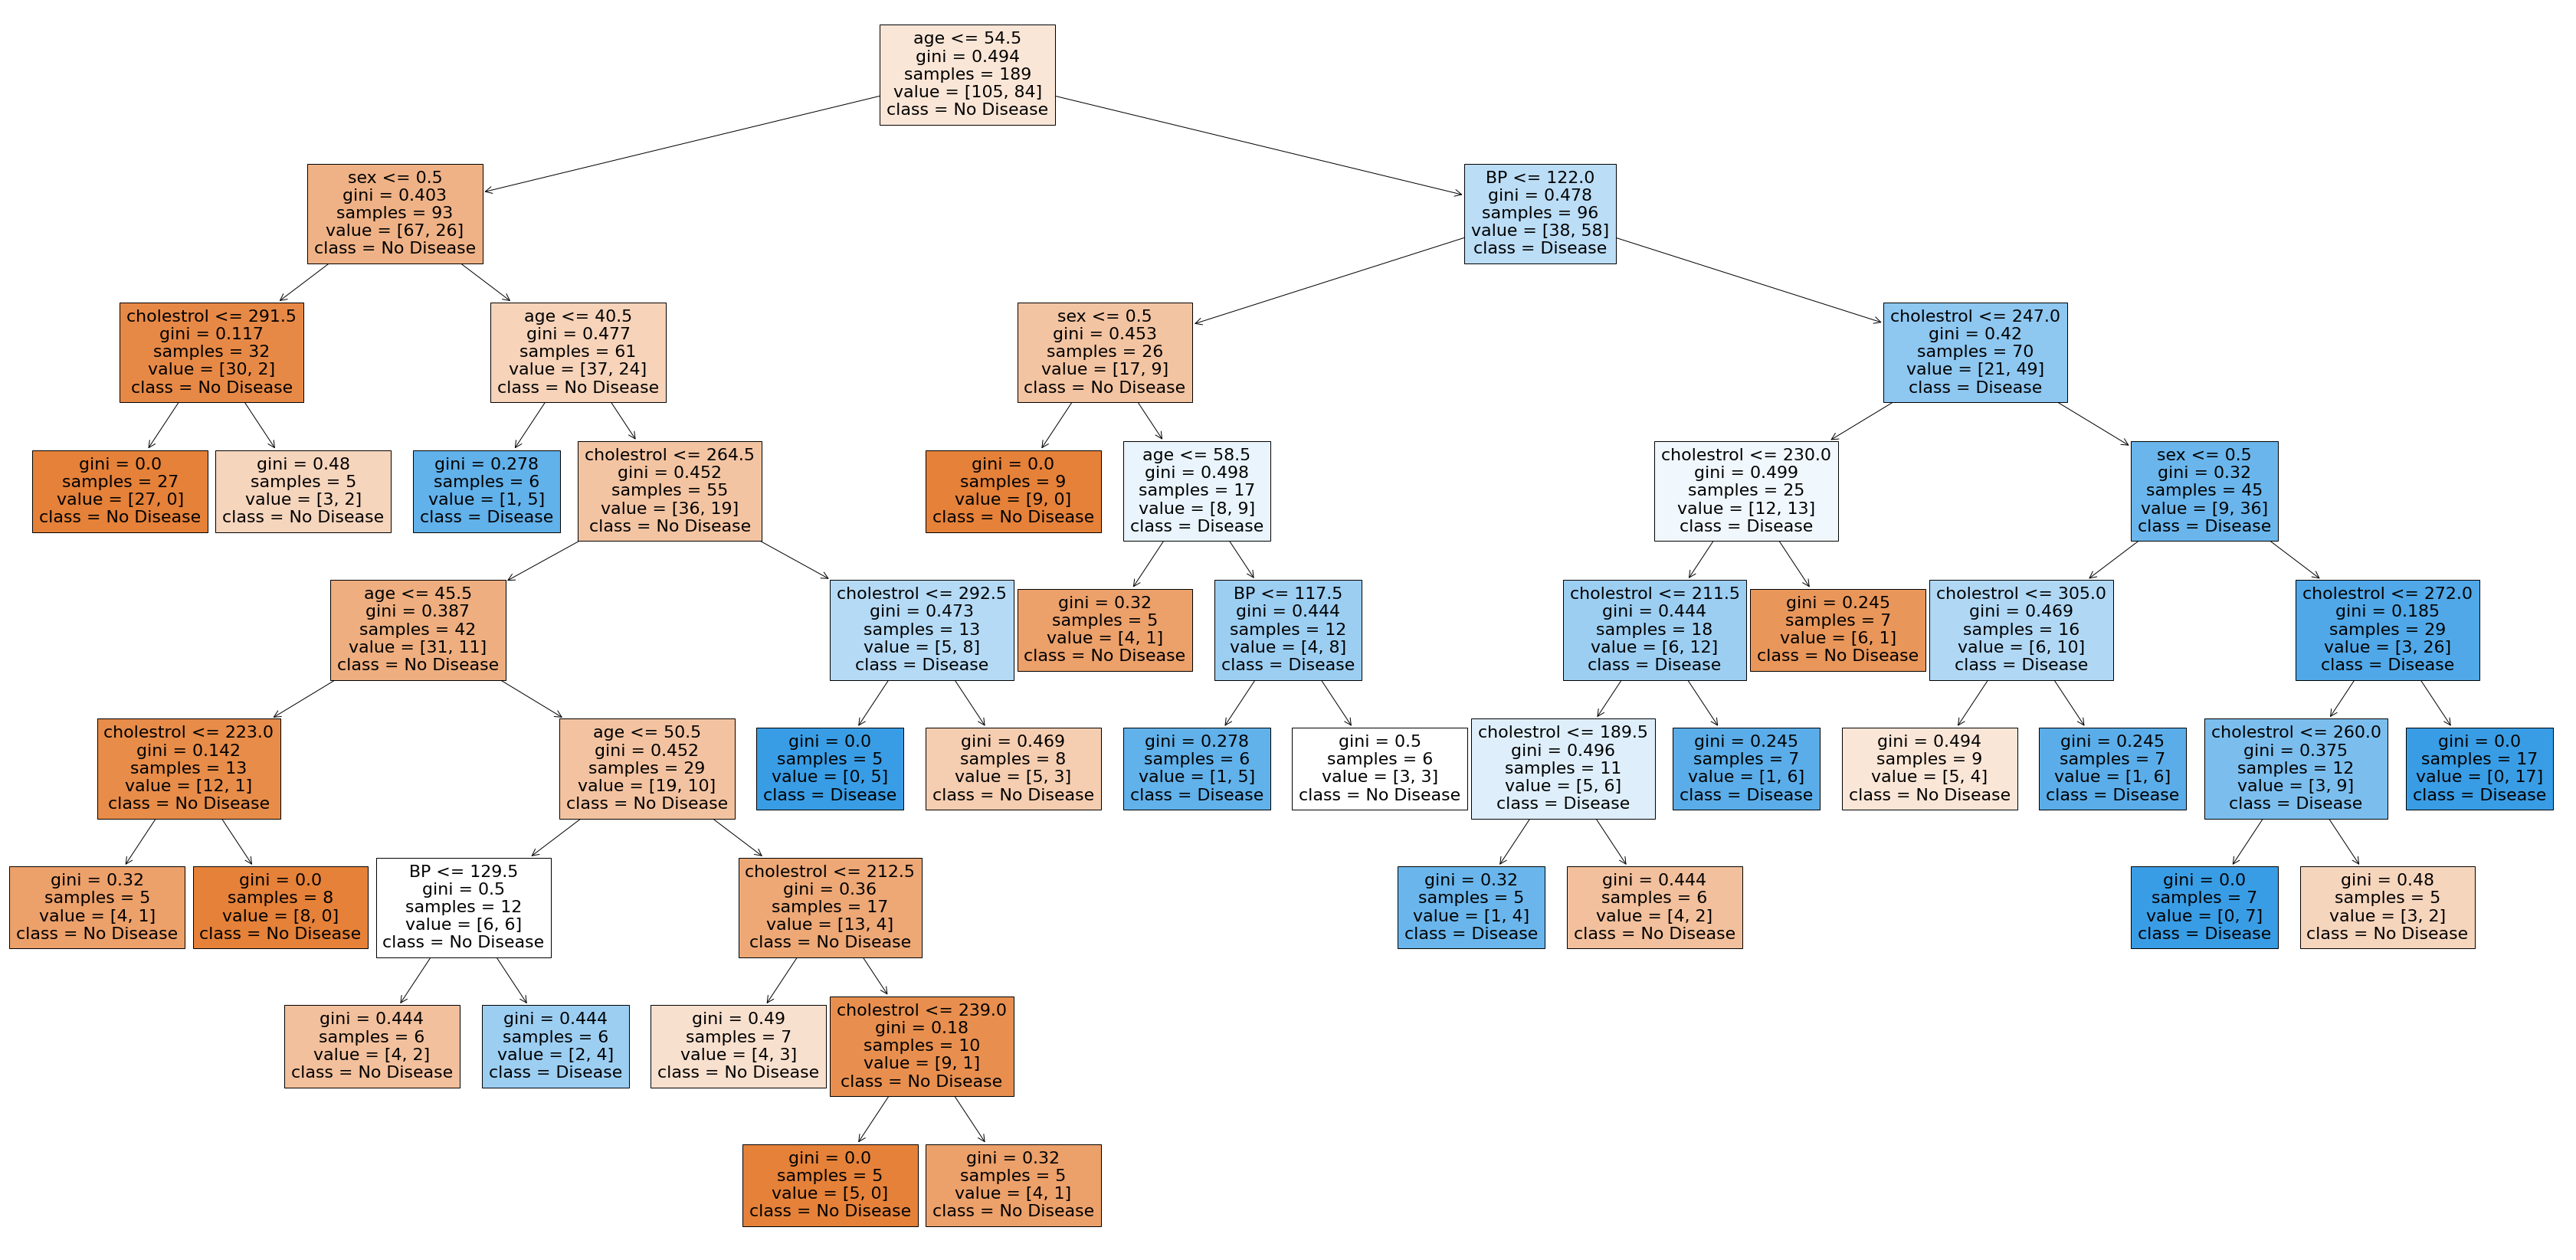

In [55]:
## getting the tree for the best model
get_dt_graph(dt_best)

### Resetting the theme

In [56]:
!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [57]:
! jt -t monokai

# RANDOM FOREST

In [58]:
## importing libraries
from sklearn.ensemble import RandomForestClassifier

In [85]:
## instantiating forest class with light hyperparameter tuning
rf = RandomForestClassifier(n_estimators=10,max_depth=3,random_state=42)

In [60]:
## fitting X_train and y_train
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

WE can see all the 10 trees and also access them by indexing

In [61]:
rf.estimators_

[DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1608637542),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1273642419),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1935803228),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=787846414),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=996406378),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1201263687),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=423734972),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=415968276),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=670094950),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1914837113)]

In [62]:
## Accessing first tree by indexing
rf.estimators_[0]

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1608637542)

- As we know that Random forest is a Black Box model, so we really can't see whats really happeneing behind the scenes.
- However we can visualise a tree from the forest individually.
- let's see what the 5th tree looks like

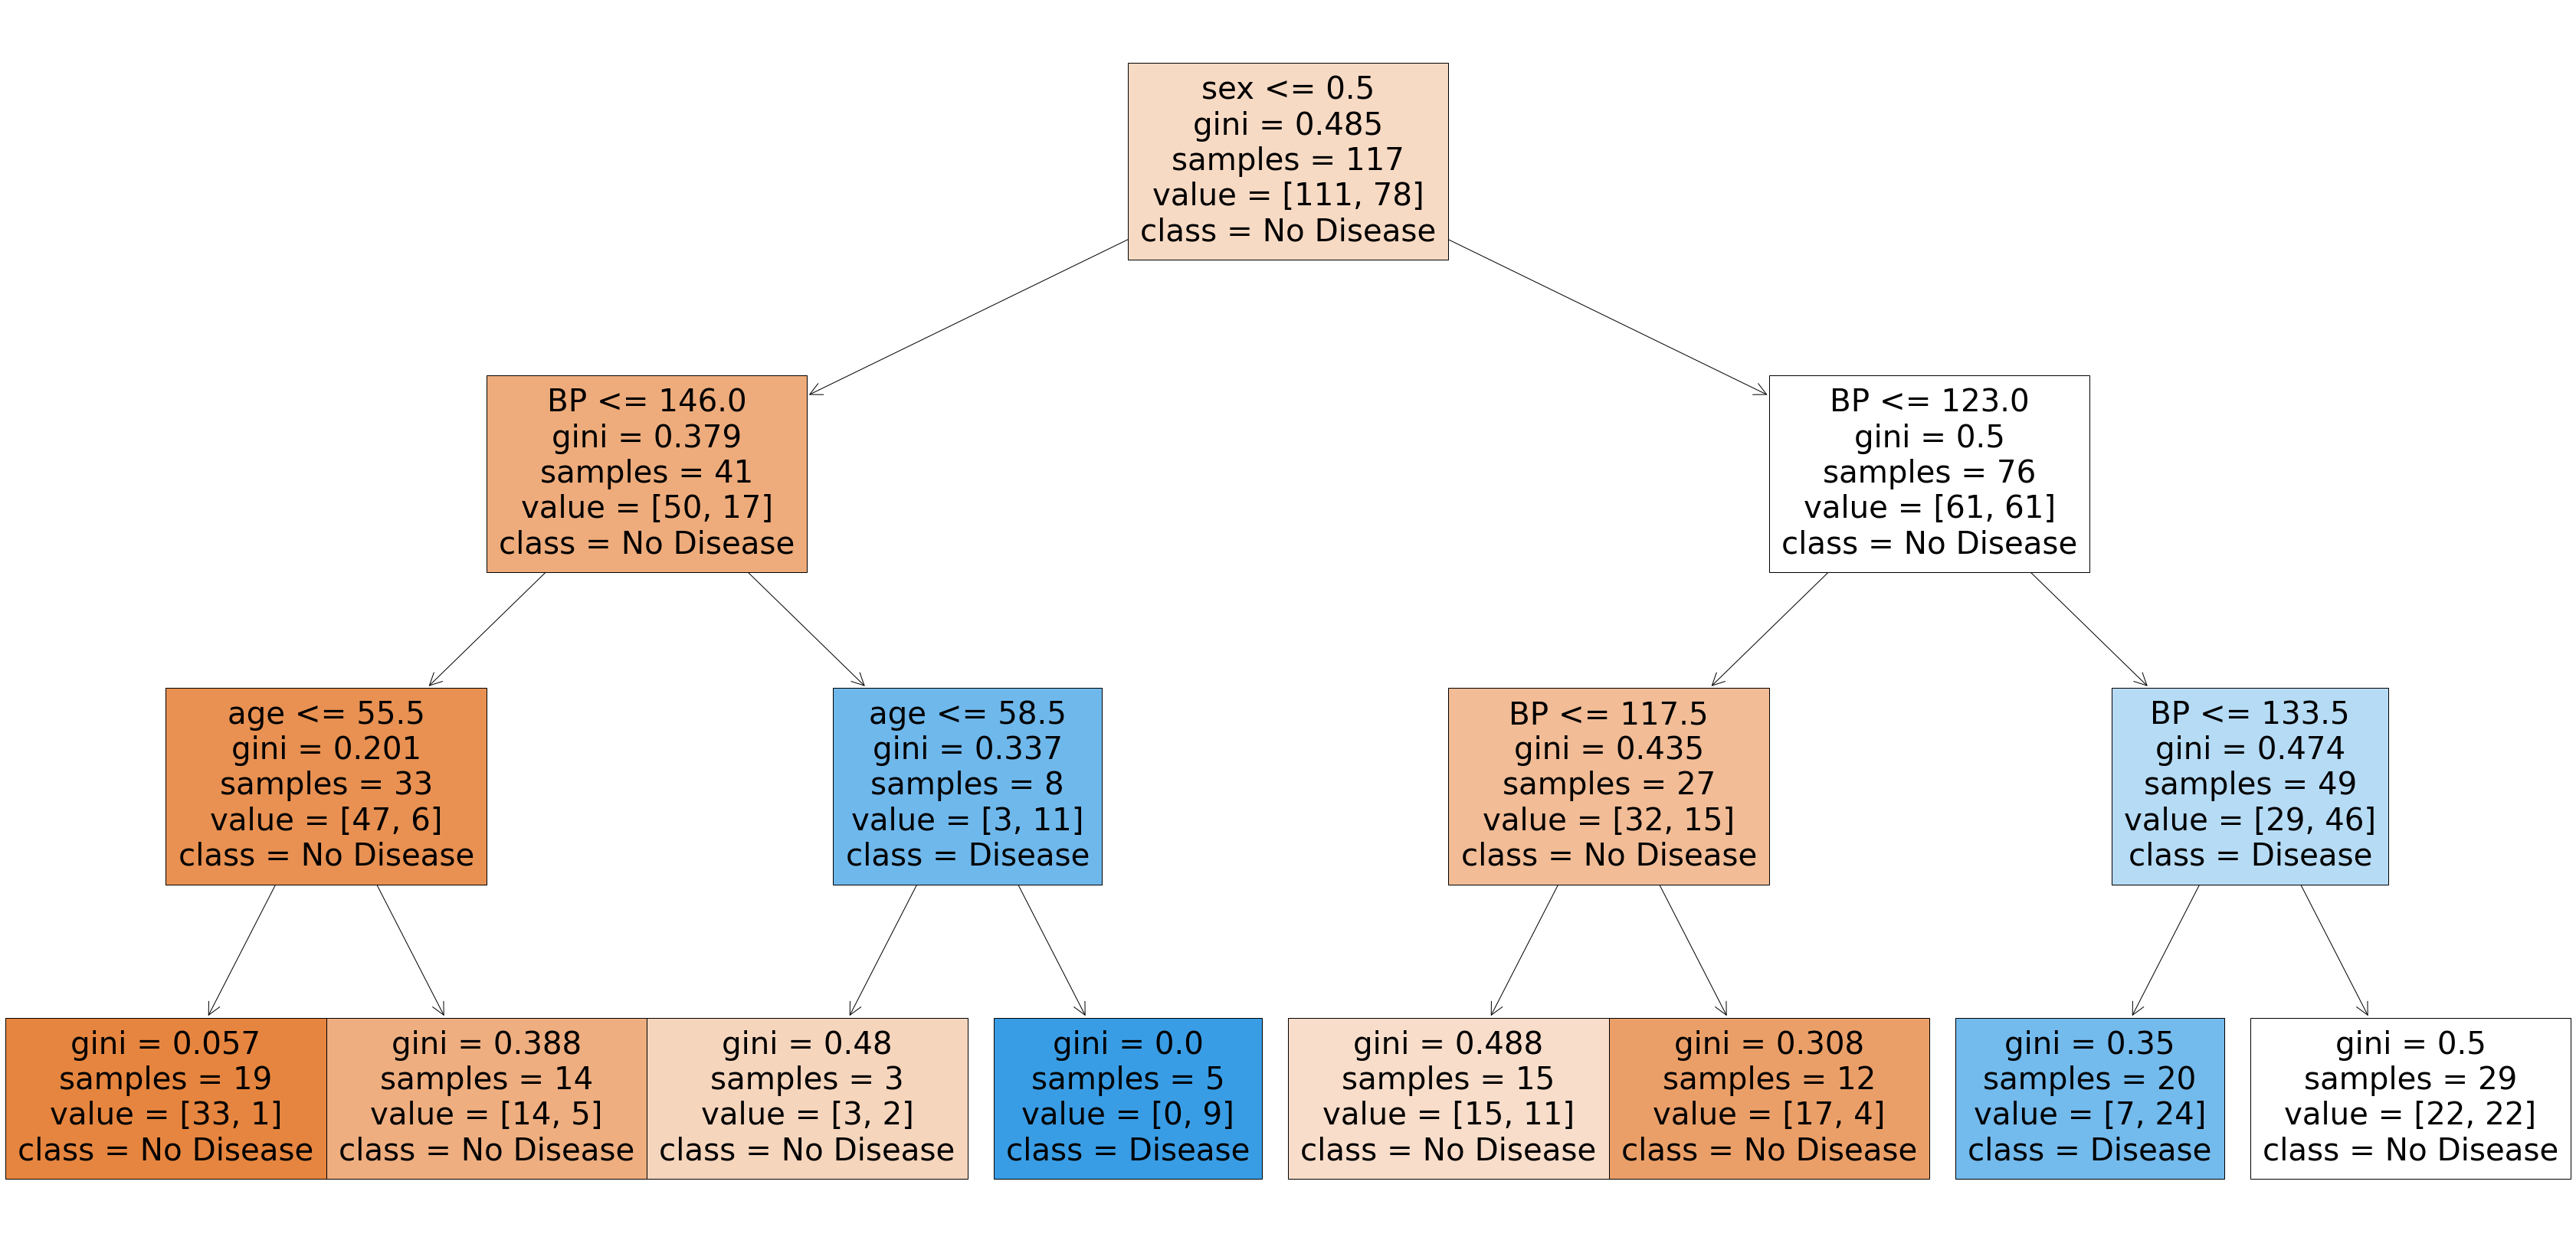

In [63]:
# Visualising the 5th tree
## accesing the 5th tree by indexing and naming it as sample tree
sample_tree = rf.estimators_[4]
## visualising sample tree
## calling the get_dt_graph function
get_dt_graph(sample_tree)


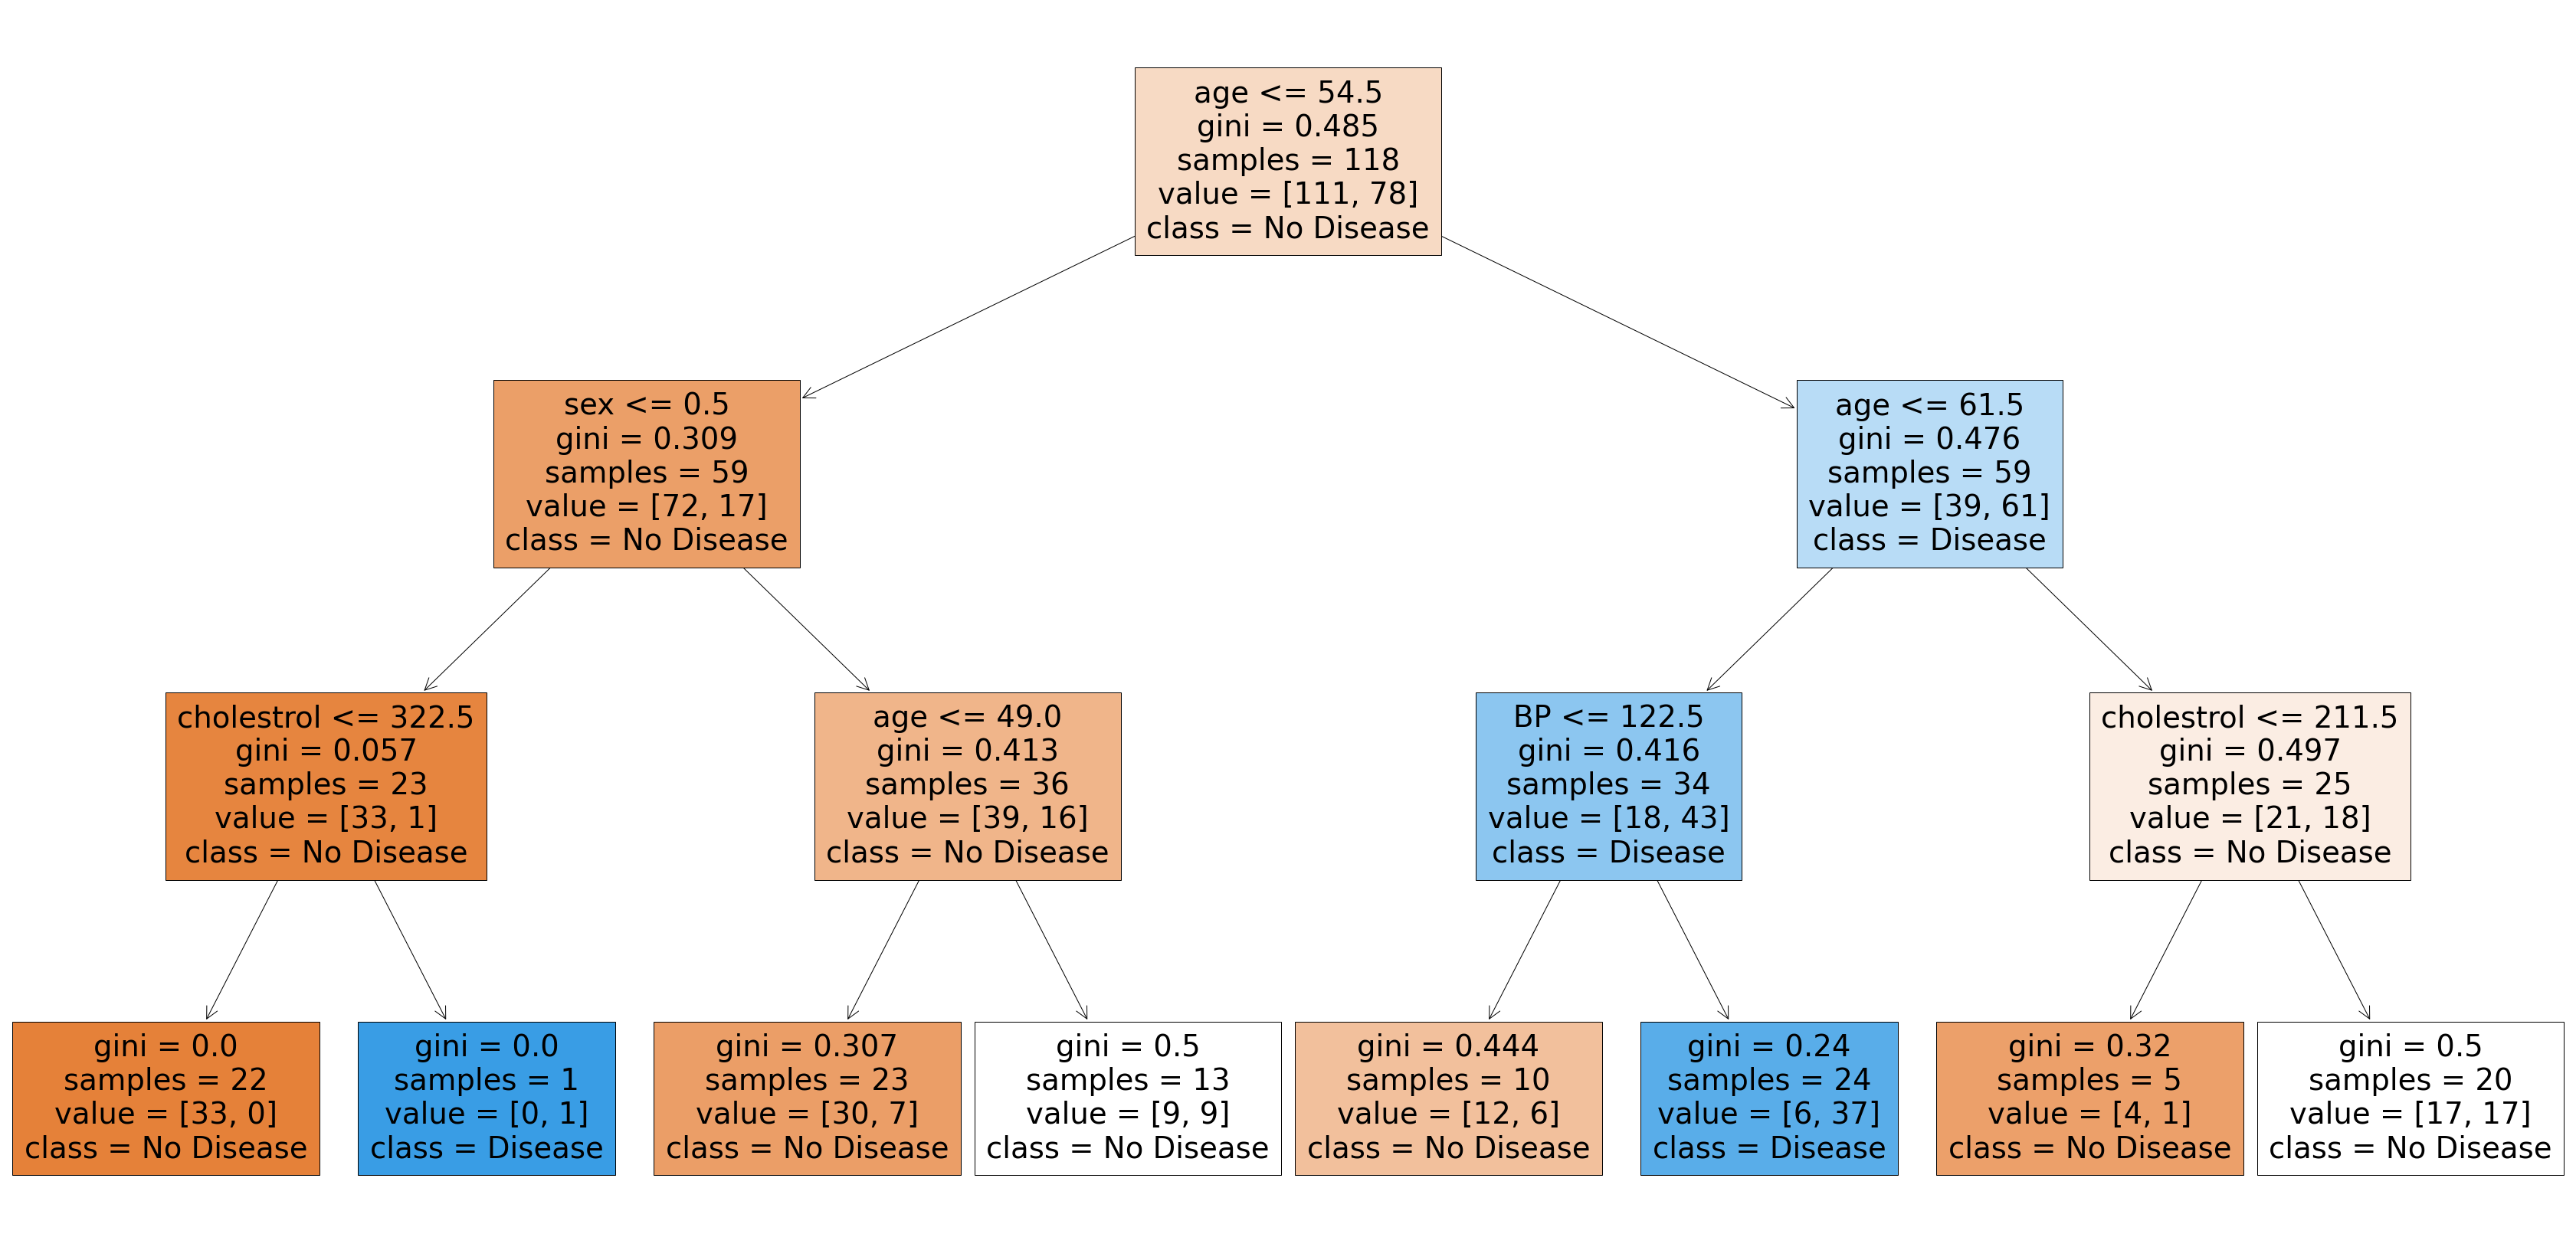

In [64]:
## let's look at the 3rd tree as well
## calling the get_dt_graph fucntion
get_dt_graph(rf.estimators_[2])

- For the 3rd tree the root node is 'Age', while for the 5th tree the root node is 'Sex'
- This is a testimony to the diversity and splitting at different features

### Evaluating the Random Forest model

In [65]:
## calling the evaluate model function
evaluate_model(rf)

Train Accuracy : 0.8095238095238095
Train Confusion Matrix:
[[86 19]
 [17 67]]
--------------------------------------------------
Test Accuracy : 0.5432098765432098
Test Confusion Matrix:
[[25 20]
 [17 19]]


### OOB SCORE

In [86]:
rf = RandomForestClassifier(random_state=42,n_jobs=-1,oob_score=True)

In [87]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=42)

In [88]:
rf.oob_score_

0.6296296296296297

In [89]:
rf.oob_score

True

- Now let's do hyperparameter tuning to improve the performance of the forest

# Hyperparameter tuning

- First let's make a vanilla classifier which will act as a base for comparisions as we 'tune' the different hyperparameters
- For this, we will choose the best hyperparameters from amongst `max_depth`,`min_samples_leaf`,`n_estimators`,`max_features`
- We will create a params dictionary

In [66]:
## instantiating the model class
classifier_rf = RandomForestClassifier(random_state=42,n_jobs=-1)

In [67]:
## Creating parameter grid
params = ({'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]})

In [68]:
## Creating Grid Search
grid_search = GridSearchCV(estimator=classifier_rf,
          cv=4,
          param_grid=params,
          scoring='accuracy',verbose=1,n_jobs=-1)

In [95]:
## fitting X and y  into grid_search as we dont need gto do train-test split on random forest
%time
grid_search.fit(X,y)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.01 µs
Fitting 4 folds for each of 375 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:   40.3s finished


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [70]:
from jupyterthemes import get_themes
from jupyterthemes.stylefx import set_nb_theme

In [71]:
set_nb_theme('monokai')

In [96]:
## Now let's see what is the best estimator as returned by grid search
rf_best= grid_search.best_estimator_

In [97]:
rf_best

RandomForestClassifier(max_depth=5, max_features=3, min_samples_leaf=5,
                       n_estimators=30, n_jobs=-1, random_state=42)

In [98]:
## let's see how this fares
## calling the evaluate_model()
evaluate_model(rf_best)

Train Accuracy : 0.7883597883597884
Train Confusion Matrix:
[[86 19]
 [21 63]]
--------------------------------------------------
Test Accuracy : 0.8395061728395061
Test Confusion Matrix:
[[43  2]
 [11 25]]


In [100]:
print("Model Accuracy :", accuracy_score(y, rf_best.predict(X)))
print("Model Confusion Matrix:")
print(confusion_matrix(y, rf_best.predict(X)))
    

Model Accuracy : 0.8037037037037037
Model Confusion Matrix:
[[129  21]
 [ 32  88]]


In [104]:
## Lets look at one sample tree
tree_1 = rf_best.estimators_[0]

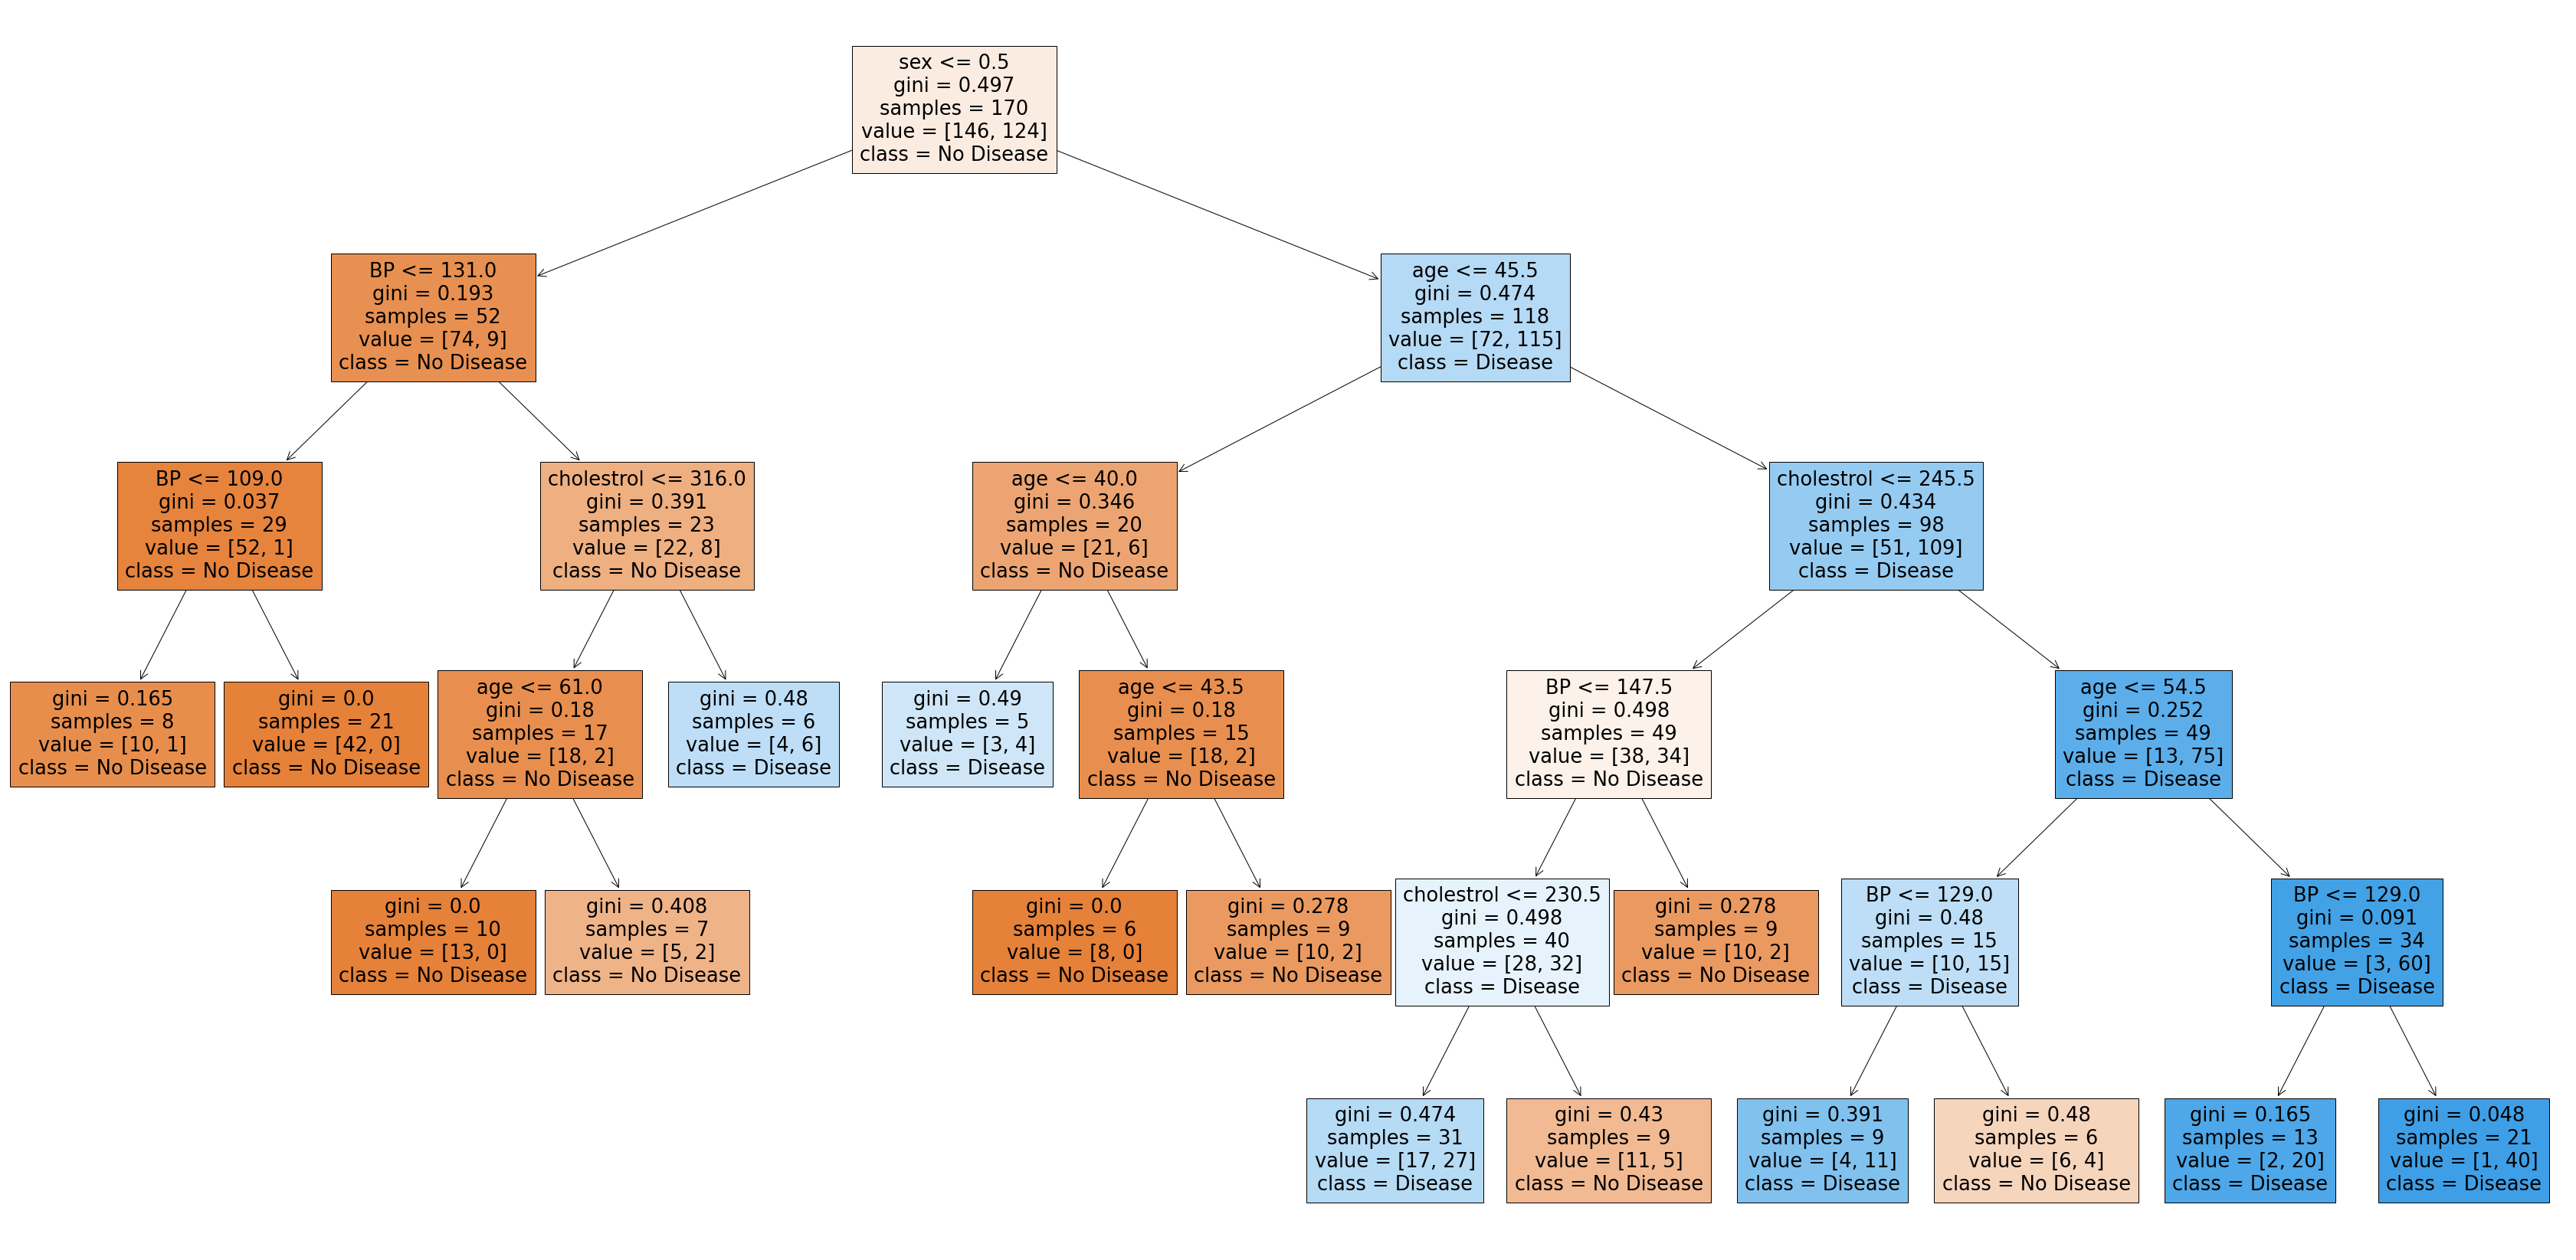

In [105]:
## Visualising
## calling get_dt_graph()
get_dt_graph(tree_1)

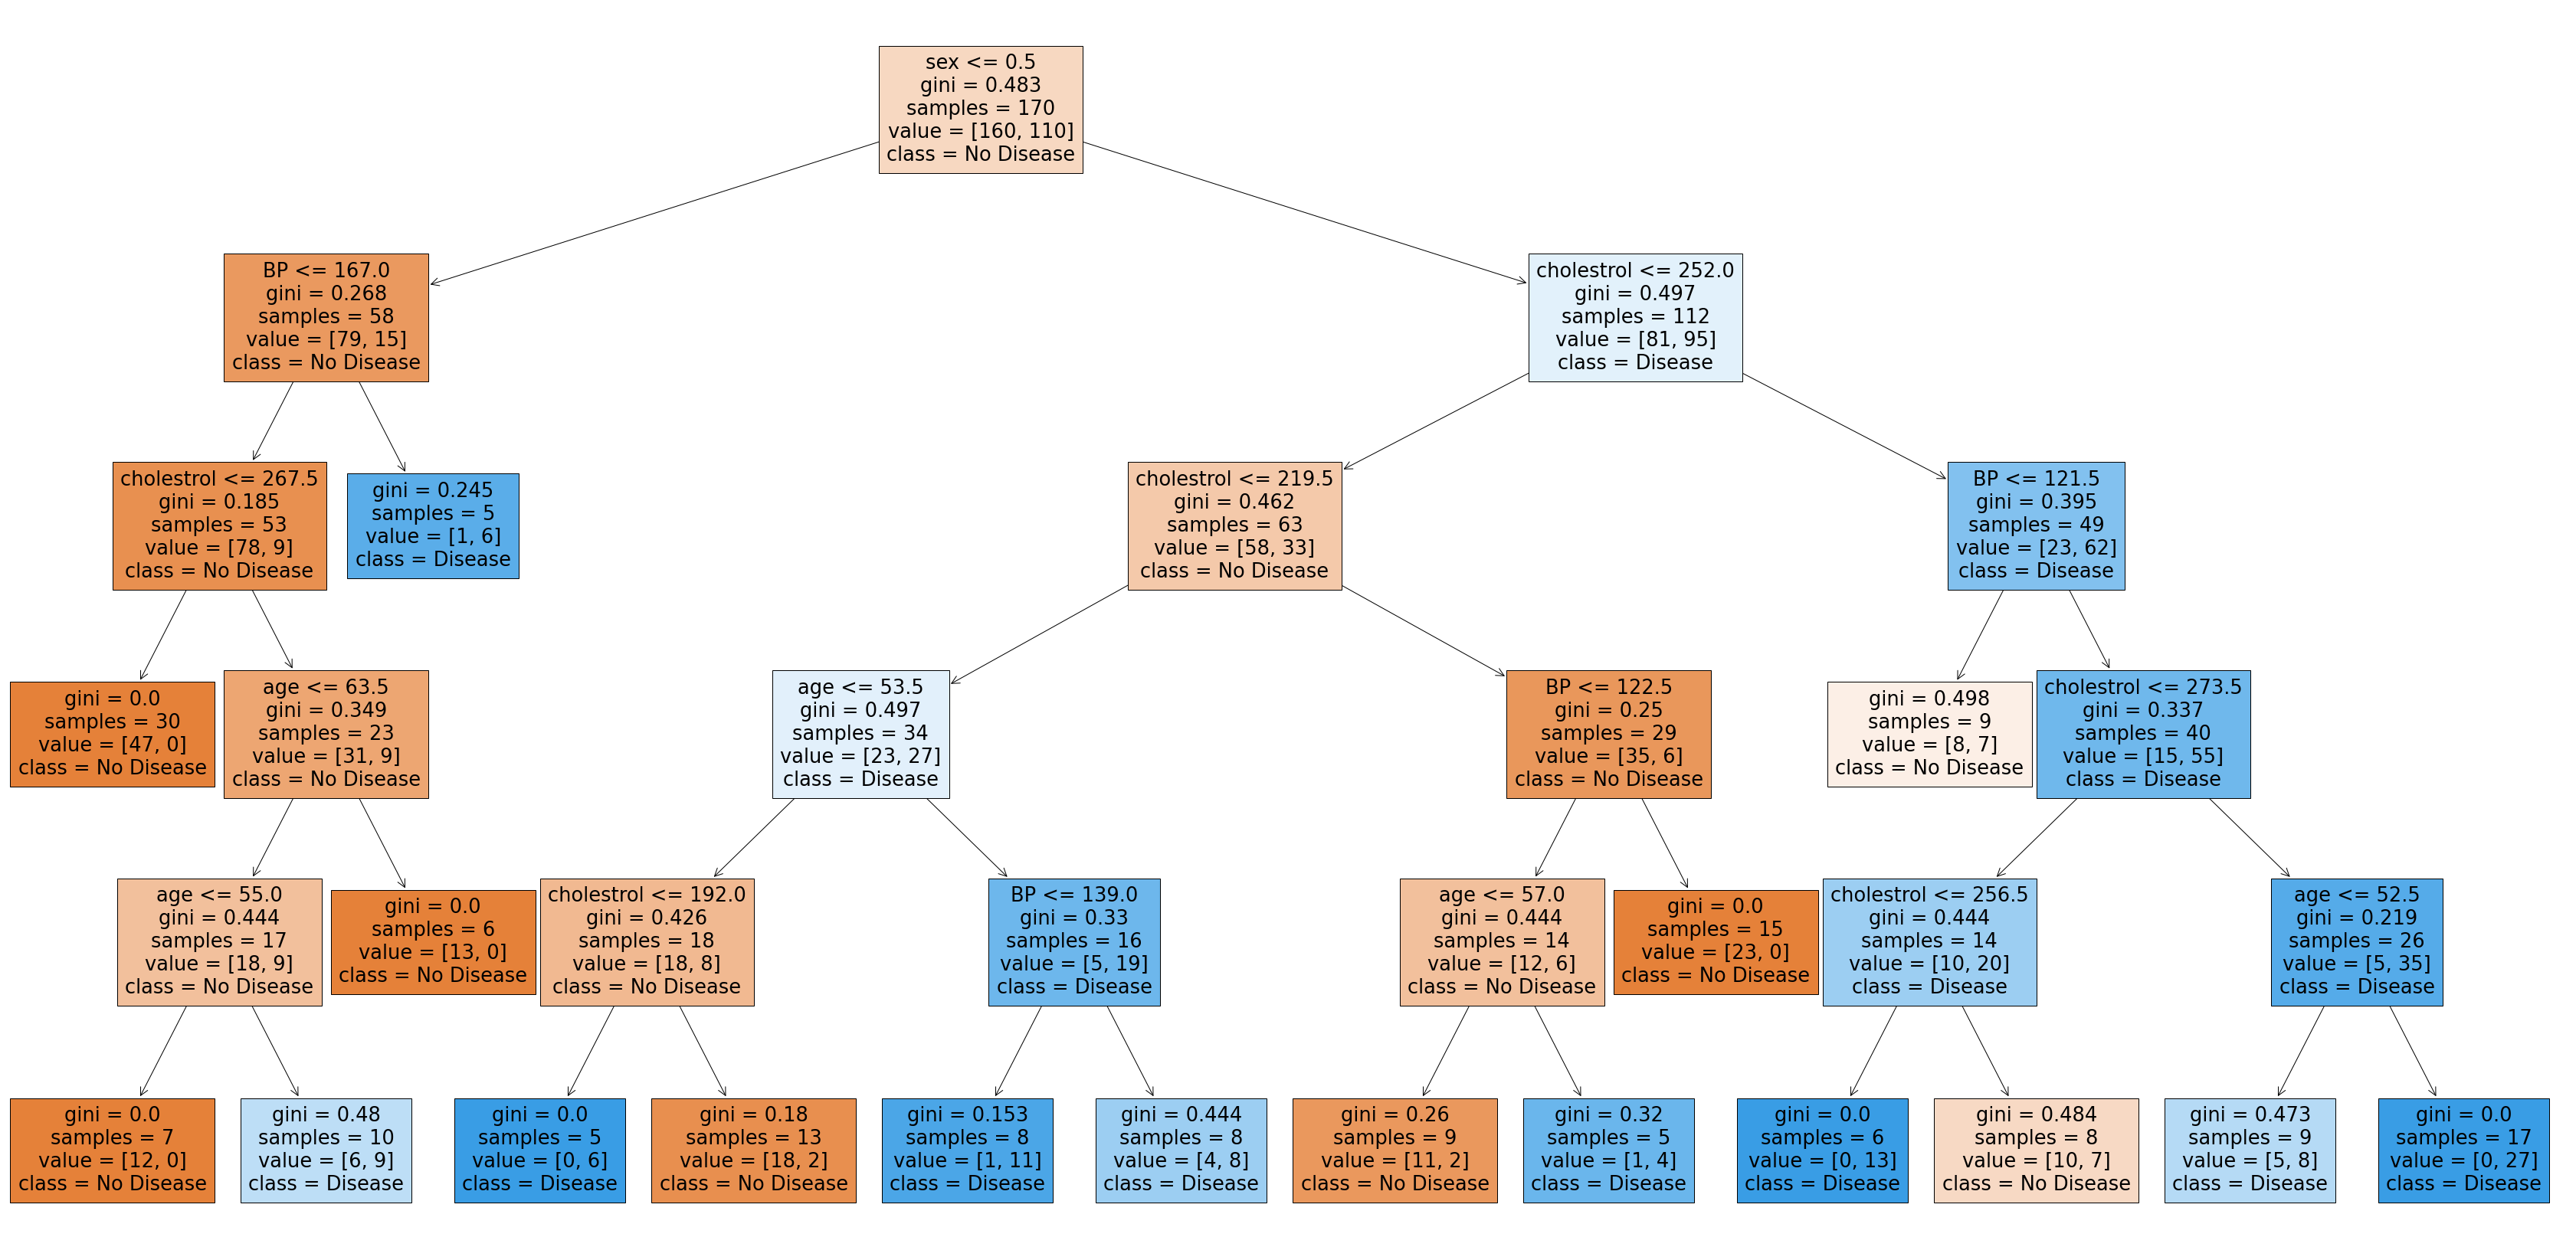

In [107]:
## let's also look at tree 11
get_dt_graph(rf_best.estimators_[10])

### Variable Importance in Random Forest 

In [108]:
## let's make a forest classifier
rf = RandomForestClassifier(random_state=42,max_depth=5,n_estimators=100,oob_score=True,n_jobs=-1)

In [109]:
## fitting X_train and y_train into the classifier
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [110]:
## getting feature importance
rf.feature_importances_

array([0.31931351, 0.17025022, 0.25358706, 0.2568492 ])

- These are ordered but as such they dont make any sense.
- Let's put them in a dataframe whose columns would correspond to X.columns

In [111]:
## Creating dataframe
df = pd.DataFrame({'Varname':X.columns,
                  'IMP':rf.feature_importances_})
df

Varname       IMP
0         age  0.319314
1         sex  0.170250
2          BP  0.253587
3  cholestrol  0.256849

In [116]:
## sorting the df
df.nlargest(5,'IMP')

Varname       IMP
0         age  0.319314
3  cholestrol  0.256849
2          BP  0.253587
1         sex  0.170250

In [119]:
df.sort_values(by='IMP',ascending=False)

Varname       IMP
0         age  0.319314
3  cholestrol  0.256849
2          BP  0.253587
1         sex  0.170250